# Predicting Survivability of passengers aboard the Titanic based on age, sex, and ticket seating information

### Trenton Tidwell, David Rubey, Yoga Murugan
#### UAB Machine Learning CS-667 summer 2023

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

pd.set_option('display.max_columns', None)

In [2]:
#df = pd.read_csv("Titanic-Dataset.csv")  #https://www.kaggle.com/competitions/titanic/data?select=test.csv
df = pd.read_csv("Titanic_Data_Full.csv") #https://www.kaggle.com/datasets/vinicius150987/titanic3
df.set_index("PassengerId", inplace=True)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S
2,0,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S
3,0,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S
4,0,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S


In [3]:
df.shape

(1309, 11)

array([[<Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>],
       [<Axes: title={'center': 'Parch'}>,
        <Axes: title={'center': 'Fare'}>]], dtype=object)

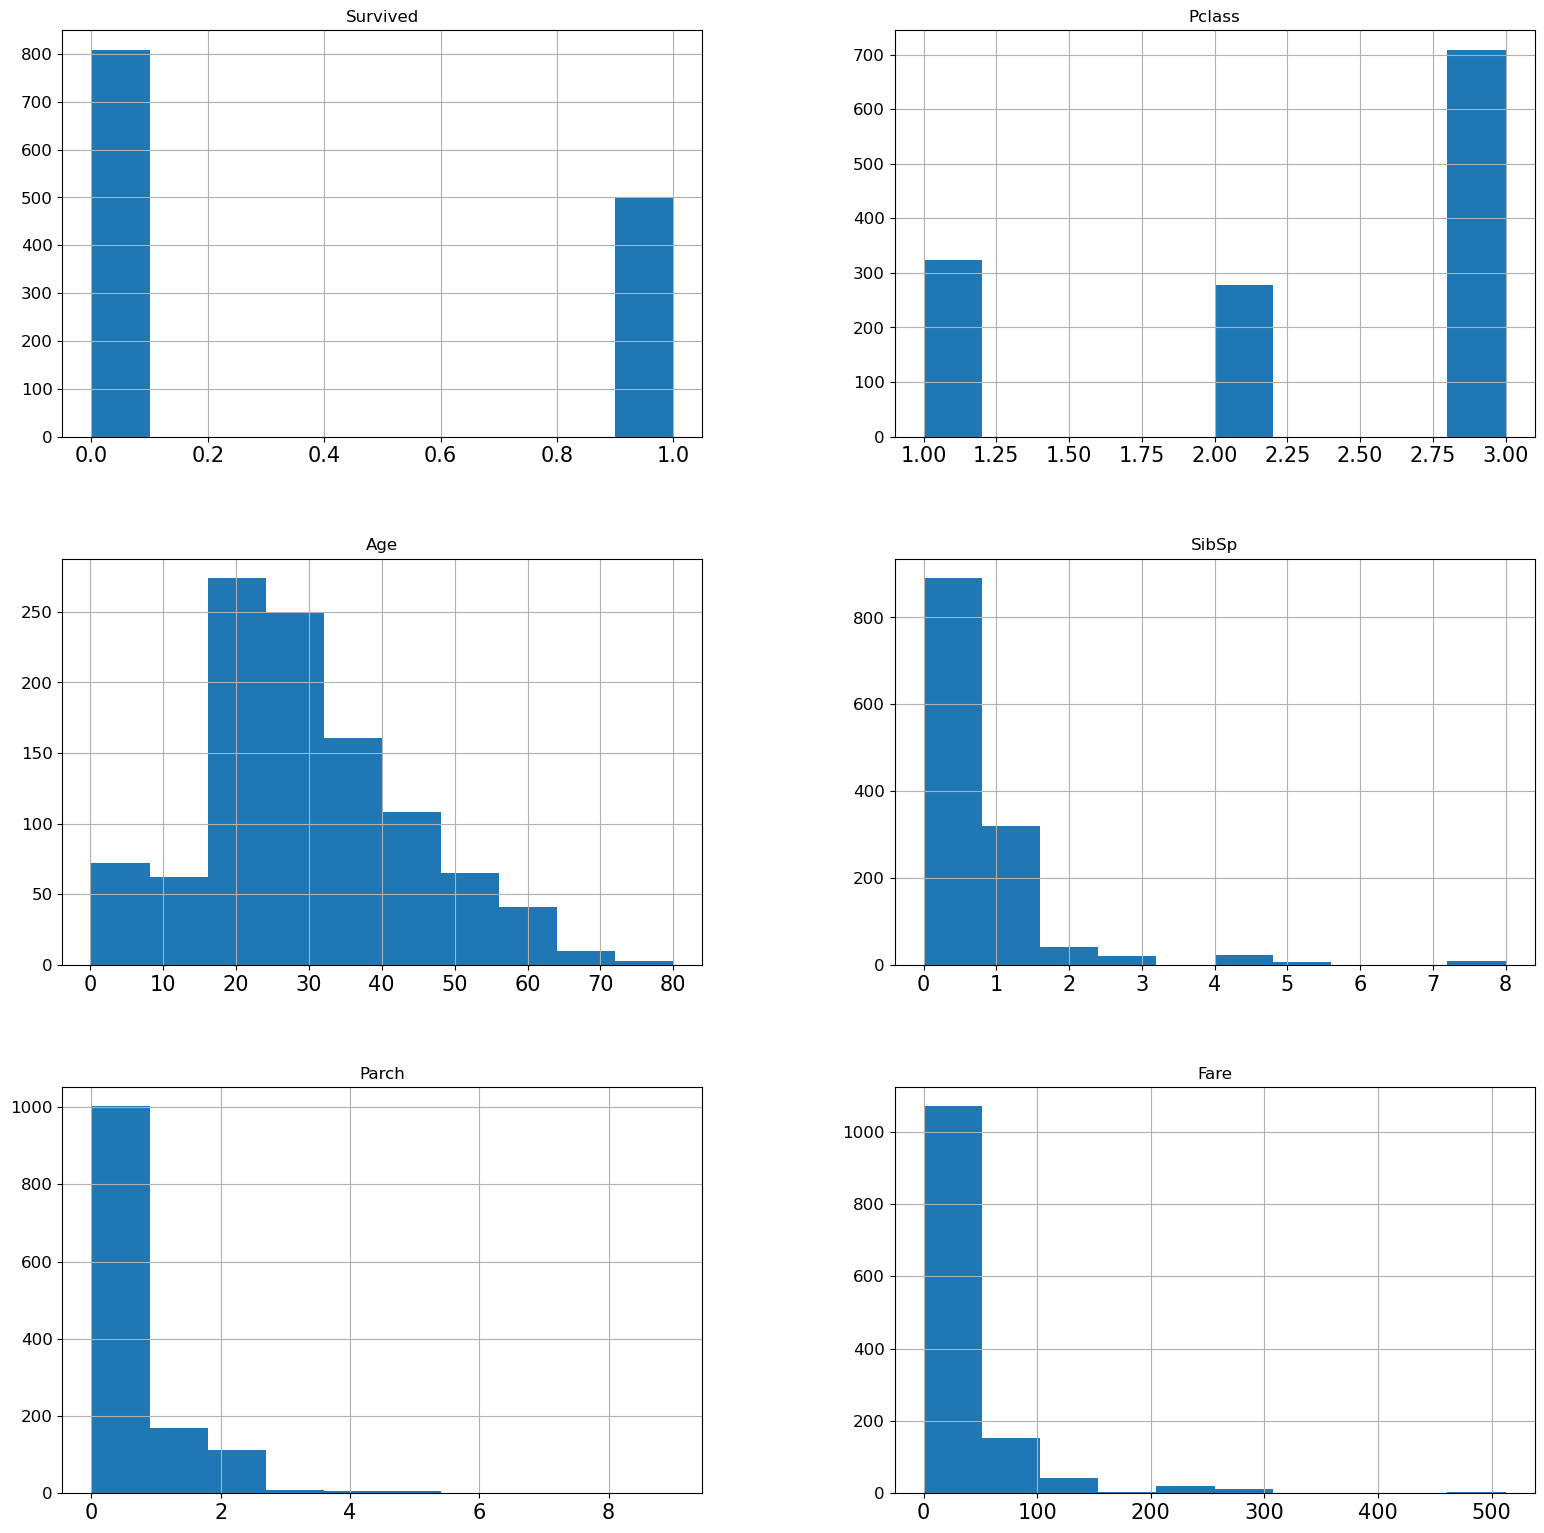

In [4]:
df.hist(xlabelsize=15, ylabelsize=12, figsize=[19, 19])

### Survived (Yes=1, No=0) is the variable we will attempt to predict based off of all other features in this data set:

   Pclass: Ticket class (1st, 2nd, 3rd)
   
   Sex: Male or Female
   
   Age: Age in years (0.92 data point represents an 11 month old child)
   
   sibsp: Number of siblings aboard the ship
   
   parch: #of of parents / children aboard the ship
   
   ticket: ticket number
   
   fare: ticket price
   
   cabin: Cabin number
   
   embarked: Port of embarkation (C=Cherbourg, Q=Queenstown, S=Southampton)

In [5]:
print("Survived : ", df.Survived.unique(), "\n")
print("Pclass   : ", df.Pclass.unique(), "\n")
print("Age      : ", df.Age.unique(), "\n")
print("SibSp    : ", df.SibSp.unique(), "\n")
print("Ticket   : ", df.Ticket.unique(), "\n")
print("Fare     : ", df.Fare.unique(), "\n")
print("Cabin    : ", df.Cabin.unique(), "\n")
print("Embarked : ", df.Embarked.unique(), "\n")

Survived :  [1 0] 

Pclass   :  [1 2 3] 

Age      :  [29.      0.9167  2.     30.     25.     48.     63.     39.     53.
 71.     47.     18.     24.     26.     80.         nan 50.     32.
 36.     37.     42.     19.     35.     28.     45.     40.     58.
 22.     41.     44.     59.     60.     33.     17.     11.     14.
 49.     76.     46.     27.     64.     55.     70.     38.     51.
 31.      4.     54.     23.     43.     52.     16.     32.5    21.
 15.     65.     28.5    45.5    56.     13.     61.     34.      6.
 57.     62.     67.      1.     12.     20.      0.8333  8.      0.6667
  7.      3.     36.5    18.5     5.     66.      9.      0.75   70.5
 22.5     0.3333  0.1667 40.5    10.     23.5    34.5    20.5    30.5
 55.5    38.5    14.5    24.5    60.5    74.      0.4167 11.5    26.5   ] 

SibSp    :  [0 1 2 3 4 5 8] 

Ticket   :  ['24160' '113781' '19952' '13502' '112050' '11769' 'PC 17609' 'PC 17757'
 'PC 17477' '19877' '27042' 'PC 17318' 'PC 17558' '11813' '

##### Above is a display of the unique values for all datapoints

# Data Preprocessing

###### We will onehot encode the "Embarked" feature first. We could drop the first feature for compressability, but we won't here because some items (one) are missing (NaN) and will be encoded as [0, 0, 0]

In [6]:
df_original = df
df = pd.get_dummies(df,prefix=['Embarked'], columns = ['Embarked'])
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,0,0,1
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,0,0,1
2,0,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,0,0,1
3,0,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,0,0,1
4,0,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,0,0,1


###### Next, let's Onehot encode the Pclass variable. values are (1, 2, 3)

In [7]:
ohe_pclass = pd.get_dummies(df,prefix=['Pclass'], columns = ['Pclass']) #Could drop first but we won't here
ohe_pclass.head()

,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
PassengerId,,,,,,,,,,,,,,,
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,0,0,1,1,0,0
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,0,0,1,1,0,0
2,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,0,0,1,1,0,0
3,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,0,0,1,1,0,0
4,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,0,0,1,1,0,0


Here is an image of a cross section of the boat, showcasing the Deck Letter meaning. This information is stored in our feature "Cabin", but needs to be split and encoded.

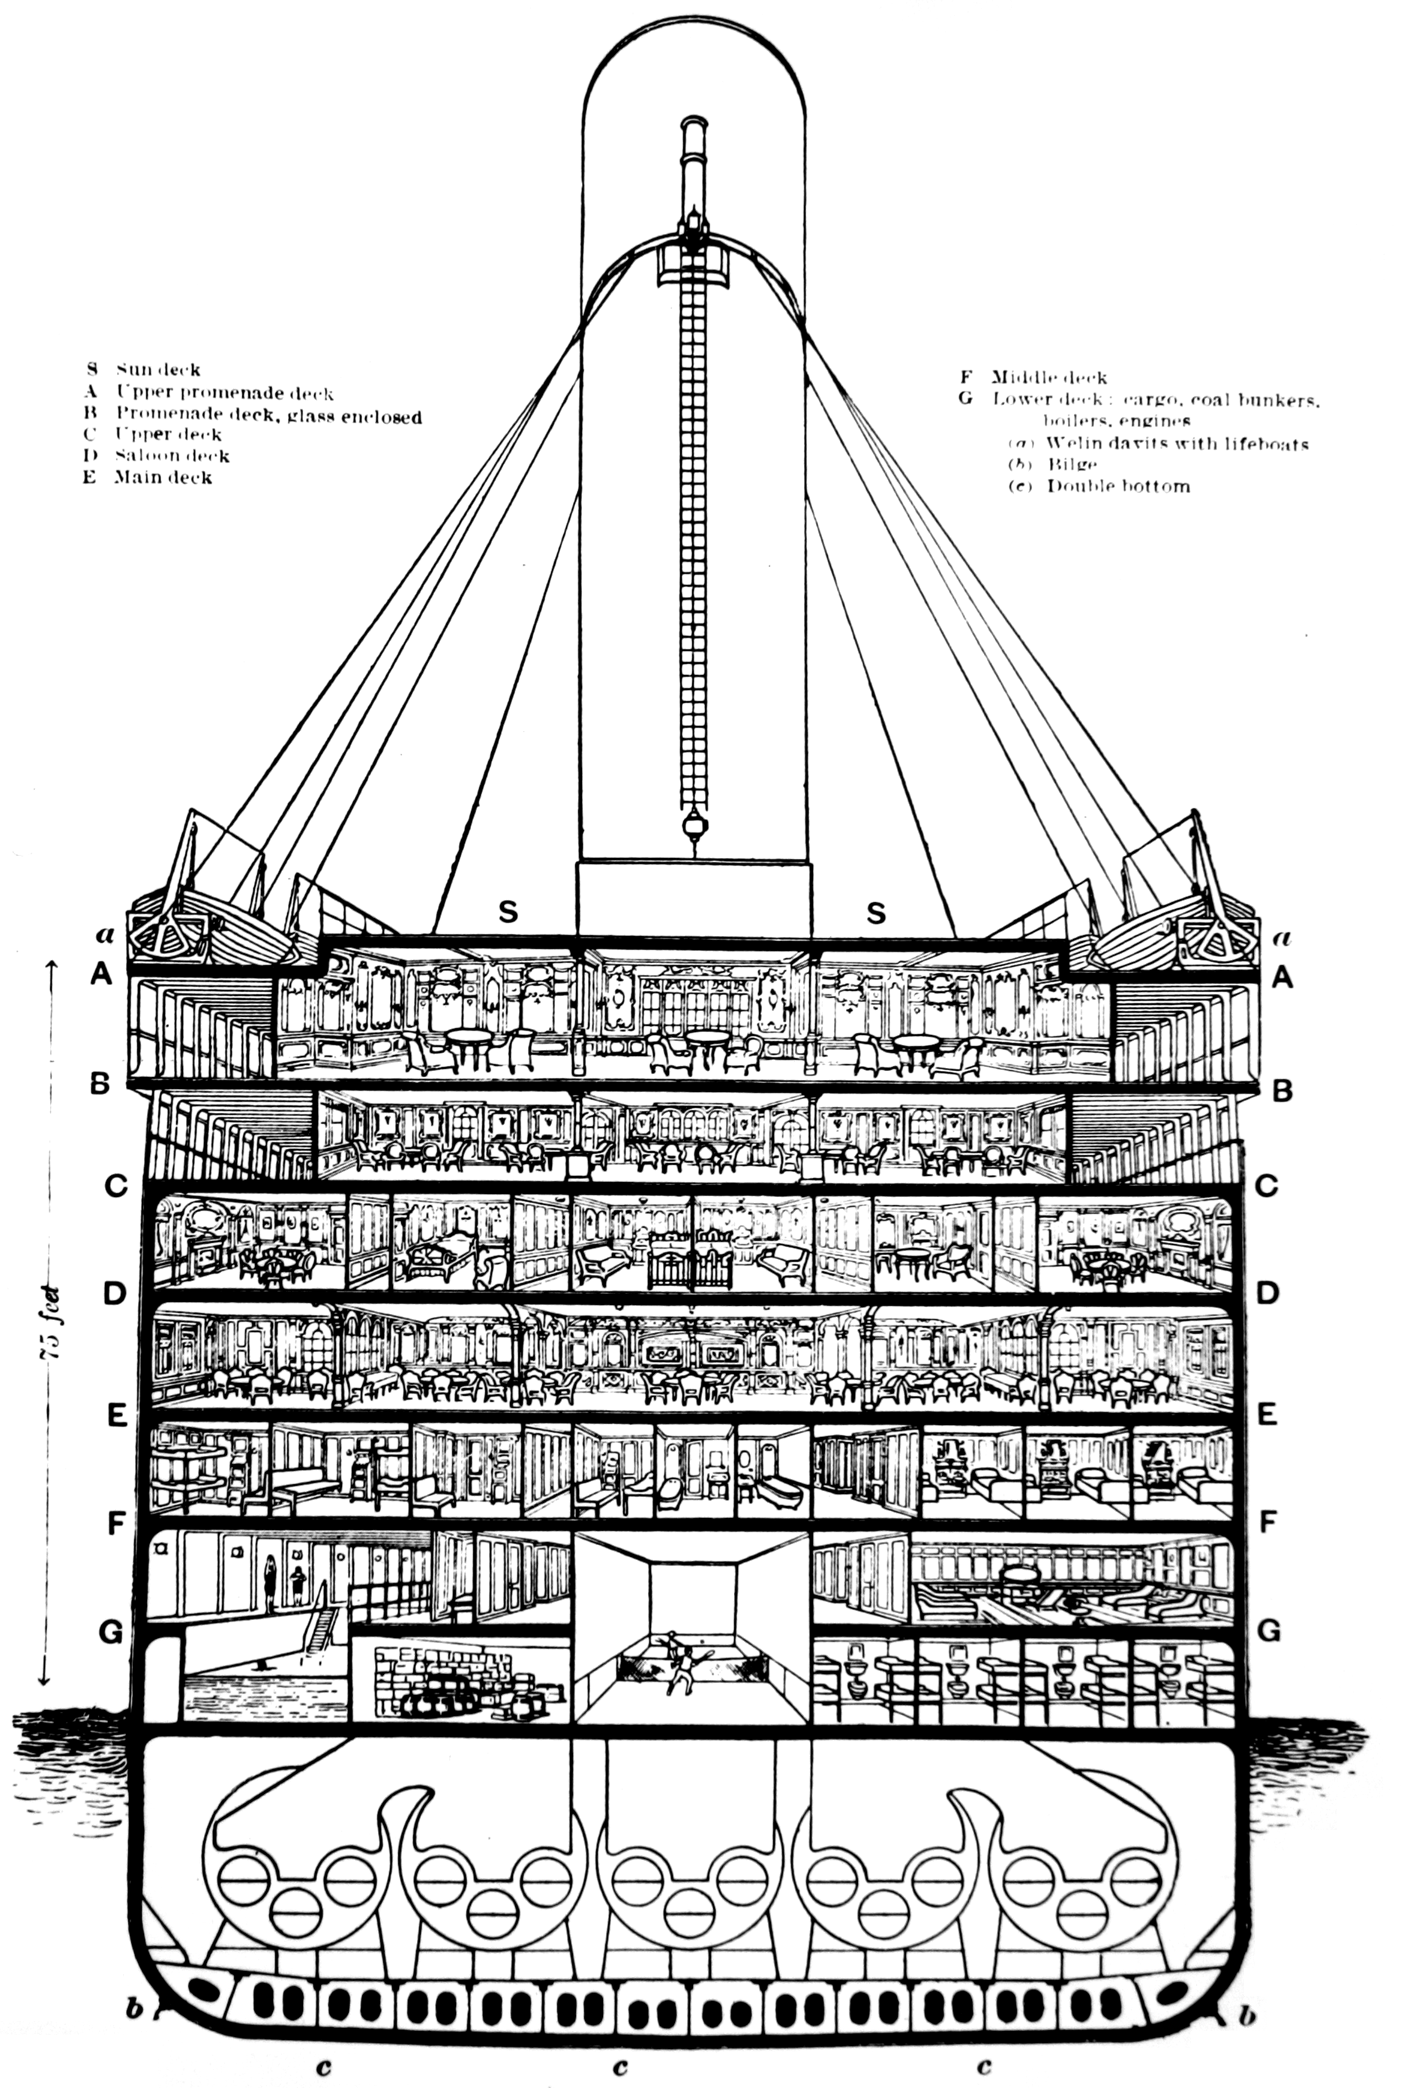

In [8]:
from IPython.display import Image
Image("https://upload.wikimedia.org/wikipedia/commons/0/0d/Olympic_%26_Titanic_cutaway_diagram.png")

In [9]:
deck_df = df['Cabin'].str.extract('([A-Za-z]+)(\d+\.?\d*)', expand = True) #This slices out the first Letter and the first Number as seperate elements
deck_df = deck_df.rename(columns = {0: "deck_letter", 1: "deck_num"})
deck_df.head()

,deck_letter,deck_num
PassengerId,,
0,B,5
1,C,22
2,C,22
3,C,22
4,C,22


In [10]:
deck_df = pd.get_dummies(deck_df,prefix=['deck'], columns = ['deck_letter'])
deck_df.head()

,deck_num,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G
PassengerId,,,,,,,,
0,5,0,1,0,0,0,0,0
1,22,0,0,1,0,0,0,0
2,22,0,0,1,0,0,0,0
3,22,0,0,1,0,0,0,0
4,22,0,0,1,0,0,0,0


##### This is a much better representation than the original Cabin value. It is also worth noting that the Left and Right sides of the boat are represented in the deck_num variable and whether or not it is even or odd.

In [11]:
deck_df['deck_even'] = deck_df.deck_num.astype("Int64")

for i in range(deck_df.shape[0]):
    
    if pd.isna(deck_df.deck_even.iloc[i]) == True:  #If NaN, stay NaN
        continue
        
    elif int(deck_df.deck_num.iloc[i]) % 2 == 0:   #If num is even, deck_even = 1
        deck_df.deck_even.iloc[i] = 1
            
    elif int(deck_df.deck_num.iloc[i]) % 2 == 1:    #If num is odd, deck_even = 0
        deck_df.deck_even.iloc[i] = 0

deck_df.head()

,deck_num,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,deck_even
PassengerId,,,,,,,,,
0,5,0,1,0,0,0,0,0,0
1,22,0,0,1,0,0,0,0,1
2,22,0,0,1,0,0,0,0,1
3,22,0,0,1,0,0,0,0,1
4,22,0,0,1,0,0,0,0,1


In [12]:
print("deck_even unique values : ", deck_df.deck_even.unique(), "\n")
print("deck_num  unique values : ", deck_df.deck_num.unique(), "\n")

deck_even unique values :  <IntegerArray>
[0, 1, <NA>]
Length: 3, dtype: Int64 

deck_num  unique values :  ['5' '22' '12' '7' '36' '101' nan '62' '35' '23' '58' '15' '6' '148' '97'
 '49' '99' '52' '31' '103' '33' '21' '10' '4' '40' '38' '24' '51' '96'
 '46' '8' '61' '77' '9' '89' '14' '45' '26' '85' '17' '71' '20' '34' '86'
 '16' '18' '54' '29' '95' '25' '111' '39' '41' '102' '123' '63' '130' '92'
 '42' '91' '125' '82' '50' '83' '94' '69' '11' '93' '28' '60' '132' '37'
 '19' '124' '80' '106' '79' '47' '30' '90' '78' '118' '48' '105' '43' '2'
 '65' '73' '104' '110' '3' '32' '57' '44' '87' '116' '55' '68' '67' '126'
 '70' '53' '128' '56' '121'] 



In [13]:
df = df.merge(deck_df, left_on="PassengerId", right_on="PassengerId")
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S,deck_num,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,deck_even
PassengerId,,,,,,,,,,,,,,,,,,,,,,
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,0,0,1,5,0,1,0,0,0,0,0,0
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,0,0,1,22,0,0,1,0,0,0,0,1
2,0,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,0,0,1,22,0,0,1,0,0,0,0,1
3,0,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,0,0,1,22,0,0,1,0,0,0,0,1
4,0,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,0,0,1,22,0,0,1,0,0,0,0,1


In [14]:
df['Sex'].replace({'female':0 ,'male':1},inplace=True)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S,deck_num,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,deck_even
PassengerId,,,,,,,,,,,,,,,,,,,,,,
0,1,1,"Allen, Miss. Elisabeth Walton",0,29.0000,0,0,24160,211.3375,B5,0,0,1,5,0,1,0,0,0,0,0,0
1,1,1,"Allison, Master. Hudson Trevor",1,0.9167,1,2,113781,151.5500,C22 C26,0,0,1,22,0,0,1,0,0,0,0,1
2,0,1,"Allison, Miss. Helen Loraine",0,2.0000,1,2,113781,151.5500,C22 C26,0,0,1,22,0,0,1,0,0,0,0,1
3,0,1,"Allison, Mr. Hudson Joshua Creighton",1,30.0000,1,2,113781,151.5500,C22 C26,0,0,1,22,0,0,1,0,0,0,0,1
4,0,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0,25.0000,1,2,113781,151.5500,C22 C26,0,0,1,22,0,0,1,0,0,0,0,1


In [15]:
df = pd.get_dummies(df,prefix=['Pclass'], columns = ['Pclass'])
df.head()

,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S,deck_num,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,deck_even,Pclass_1,Pclass_2,Pclass_3
PassengerId,,,,,,,,,,,,,,,,,,,,,,,,
0,1,"Allen, Miss. Elisabeth Walton",0,29.0000,0,0,24160,211.3375,B5,0,0,1,5,0,1,0,0,0,0,0,0,1,0,0
1,1,"Allison, Master. Hudson Trevor",1,0.9167,1,2,113781,151.5500,C22 C26,0,0,1,22,0,0,1,0,0,0,0,1,1,0,0
2,0,"Allison, Miss. Helen Loraine",0,2.0000,1,2,113781,151.5500,C22 C26,0,0,1,22,0,0,1,0,0,0,0,1,1,0,0
3,0,"Allison, Mr. Hudson Joshua Creighton",1,30.0000,1,2,113781,151.5500,C22 C26,0,0,1,22,0,0,1,0,0,0,0,1,1,0,0
4,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0,25.0000,1,2,113781,151.5500,C22 C26,0,0,1,22,0,0,1,0,0,0,0,1,1,0,0


In [16]:
df_dropped = df[["Name", "Ticket"]]
df_dropped.head()

,Name,Ticket
PassengerId,,
0,"Allen, Miss. Elisabeth Walton",24160
1,"Allison, Master. Hudson Trevor",113781
2,"Allison, Miss. Helen Loraine",113781
3,"Allison, Mr. Hudson Joshua Creighton",113781
4,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",113781


In [17]:
df = df.drop(["Name", "Ticket", "Cabin"], axis=1)
df.head()

,Survived,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,deck_num,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,deck_even,Pclass_1,Pclass_2,Pclass_3
PassengerId,,,,,,,,,,,,,,,,,,,,,
0,1,0,29.0000,0,0,211.3375,0,0,1,5,0,1,0,0,0,0,0,0,1,0,0
1,1,1,0.9167,1,2,151.5500,0,0,1,22,0,0,1,0,0,0,0,1,1,0,0
2,0,0,2.0000,1,2,151.5500,0,0,1,22,0,0,1,0,0,0,0,1,1,0,0
3,0,1,30.0000,1,2,151.5500,0,0,1,22,0,0,1,0,0,0,0,1,1,0,0
4,0,0,25.0000,1,2,151.5500,0,0,1,22,0,0,1,0,0,0,0,1,1,0,0


#### Now we have all numbers, which is nice.

##### We'll go ahead and shuffle as well

In [18]:
#df = df.sample(frac=1).reset_index(drop=True) #Shuffle

#### Some predictors don't handle NaN values well. In this case we have decided to create a dataset with omitted NaN values for these model types: decision tree and random forest. Any var with "_n" or "_nonan" represents the vanilla no-nan data

In [19]:
df_nonan = df.dropna()
nonan_rows = df_nonan.shape[0]
full_rows = df.shape[0]

#### We can encode some NaN values in a meaningful way for some models, 

#### We will turn NaNs in the cabin even/odd feature into 0.5 as it is between 0 and 1 and reflects our knowlege of the value. This however negates the feature's status as a categorical variable. 

#### Cabin number can be represented with the midpoint of the range of values as that is a reflection of the likely position of the person on the boat under the assumption that all decks have the same number of rooms of equidistant spacing (this is untrue). The range of this data is 2 to 121, so we will replace with the midpoint of these values: 60. Though mean/med/mode of the feature are also valid options

#### Age NaNs will be replaced by the average age which is 29.88 for the Full dataset

#### Fare NaNs will be replaced by the average Fare which is 33.29 for the Full dataset

#### Embarked NaNs have inherently been ingested into the Embarked encoding as [0, 0, 0]

#### Ticket NaNs have been dropped with the entirety of the row

In [20]:
df_noncat = df.copy()

df_noncat.deck_even = df_noncat.deck_even.astype('float64')
avg_age = df_noncat.Age.mean()
avg_fare = df_noncat.Fare.mean()

for i in range(df_noncat.shape[0]):
    
    if pd.isna(df_noncat.deck_even.iloc[i]) == True:  #If deck_even is NaN
        df_noncat.deck_even.iloc[i] = 0.5
        
    if pd.isna(df_noncat.deck_num.iloc[i]) == True:   #If deck_num is NaN
        df_noncat.deck_num.iloc[i] = 60
        
    if pd.isna(df_noncat.Age.iloc[i]) == True:        #If age is NaN
        df_noncat.Age.iloc[i] = avg_age
        
    if pd.isna(df_noncat.Fare.iloc[i]) == True:       #If fare is NaN
        df_noncat.Fare.iloc[i] = avg_fare

    
df_noncat.deck_num = df_noncat.deck_num.astype(int)
print(df_noncat.deck_even.unique())
print(df_noncat.deck_num.unique())

C:\Users\trent\AppData\Local\Temp\ipykernel_5460\3107431893.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_noncat.deck_even.iloc[i] = 0.5
C:\Users\trent\AppData\Local\Temp\ipykernel_5460\3107431893.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_noncat.deck_num.iloc[i] = 60
C:\Users\trent\AppData\Local\Temp\ipykernel_5460\3107431893.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_noncat.Age.iloc[i] = avg_age


[0.  1.  0.5]
[  5  22  12   7  36 101  60  62  35  23  58  15   6 148  97  49  99  52
  31 103  33  21  10   4  40  38  24  51  96  46   8  61  77   9  89  14
  45  26  85  17  71  20  34  86  16  18  54  29  95  25 111  39  41 102
 123  63 130  92  42  91 125  82  50  83  94  69  11  93  28 132  37  19
 124  80 106  79  47  30  90  78 118  48 105  43   2  65  73 104 110   3
  32  57  44  87 116  55  68  67 126  70  53 128  56 121]


C:\Users\trent\AppData\Local\Temp\ipykernel_5460\3107431893.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_noncat.Fare.iloc[i] = avg_fare


In [21]:
print(avg_age, avg_fare)

29.8811345124283 33.29547928134557


In [22]:
df_noncat.head()

,Survived,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,deck_num,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,deck_even,Pclass_1,Pclass_2,Pclass_3
PassengerId,,,,,,,,,,,,,,,,,,,,,
0,1,0,29.0000,0,0,211.3375,0,0,1,5,0,1,0,0,0,0,0,0.0,1,0,0
1,1,1,0.9167,1,2,151.5500,0,0,1,22,0,0,1,0,0,0,0,1.0,1,0,0
2,0,0,2.0000,1,2,151.5500,0,0,1,22,0,0,1,0,0,0,0,1.0,1,0,0
3,0,1,30.0000,1,2,151.5500,0,0,1,22,0,0,1,0,0,0,0,1.0,1,0,0
4,0,0,25.0000,1,2,151.5500,0,0,1,22,0,0,1,0,0,0,0,1.0,1,0,0


#### Now we can drop the rest of the rows with NaN values and maintain a larger volume of data

In [23]:
print(df.shape)
df_noncat = df_noncat.dropna()
filled_rows = df_noncat.shape[0]
print(df_noncat.shape)

(1309, 21)
(1309, 21)


# We can now create our X and Y variables to be used for model training and testing

In [24]:
Y = df[["Survived"]]
X = df.drop(["Survived"], axis=1).astype('float64')

print(X.shape)
X.head()

(1309, 20)


,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,deck_num,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,deck_even,Pclass_1,Pclass_2,Pclass_3
PassengerId,,,,,,,,,,,,,,,,,,,,
0,0.0,29.0000,0.0,0.0,211.3375,0.0,0.0,1.0,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.9167,1.0,2.0,151.5500,0.0,0.0,1.0,22.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,0.0,2.0000,1.0,2.0,151.5500,0.0,0.0,1.0,22.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,1.0,30.0000,1.0,2.0,151.5500,0.0,0.0,1.0,22.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,0.0,25.0000,1.0,2.0,151.5500,0.0,0.0,1.0,22.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [25]:
Y_n = df_nonan[["Survived"]]
X_n = df_nonan.drop(["Survived"], axis=1).astype('float64')

X_n["deck_num"]  = X_n["deck_num"].astype(int)
X_n["deck_even"] = X_n["deck_even"].astype(int)

print(X_n.shape)
X_n.head()

(267, 20)


,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,deck_num,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,deck_even,Pclass_1,Pclass_2,Pclass_3
PassengerId,,,,,,,,,,,,,,,,,,,,
0,0.0,29.0000,0.0,0.0,211.3375,0.0,0.0,1.0,5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,1.0,0.0,0.0
1,1.0,0.9167,1.0,2.0,151.5500,0.0,0.0,1.0,22,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,1.0,0.0,0.0
2,0.0,2.0000,1.0,2.0,151.5500,0.0,0.0,1.0,22,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,1.0,0.0,0.0
3,1.0,30.0000,1.0,2.0,151.5500,0.0,0.0,1.0,22,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,1.0,0.0,0.0
4,0.0,25.0000,1.0,2.0,151.5500,0.0,0.0,1.0,22,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,1.0,0.0,0.0


In [26]:
Y_nc = df_noncat[["Survived"]]
X_nc = df_noncat.drop(["Survived"], axis=1).astype('float64')

X_nc["deck_num"]  = X_nc["deck_num"].astype(int)

print(X_nc.shape)
X_nc.head()

(1309, 20)


,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,deck_num,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,deck_even,Pclass_1,Pclass_2,Pclass_3
PassengerId,,,,,,,,,,,,,,,,,,,,
0,0.0,29.0000,0.0,0.0,211.3375,0.0,0.0,1.0,5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.9167,1.0,2.0,151.5500,0.0,0.0,1.0,22,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,0.0,2.0000,1.0,2.0,151.5500,0.0,0.0,1.0,22,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,1.0,30.0000,1.0,2.0,151.5500,0.0,0.0,1.0,22,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,0.0,25.0000,1.0,2.0,151.5500,0.0,0.0,1.0,22,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


## Let's also create a normalized dataset

In [27]:
X_norm = (X-X.min())/(X.max()-X.min())
Y_norm = Y

X_norm_n = (X_n-X_n.min())/(X_n.max()-X_n.min())
Y_norm_n = Y_n

X_norm_nc = (X_nc-X_nc.min())/(X_nc.max()-X_nc.min())
Y_norm_nc = Y_nc

X_norm.head()

,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,deck_num,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,deck_even,Pclass_1,Pclass_2,Pclass_3
PassengerId,,,,,,,,,,,,,,,,,,,,
0,0.0,0.361169,0.000,0.000000,0.412503,0.0,0.0,1.0,0.020548,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.009395,0.125,0.222222,0.295806,0.0,0.0,1.0,0.136986,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,0.0,0.022964,0.125,0.222222,0.295806,0.0,0.0,1.0,0.136986,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,1.0,0.373695,0.125,0.222222,0.295806,0.0,0.0,1.0,0.136986,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,0.0,0.311064,0.125,0.222222,0.295806,0.0,0.0,1.0,0.136986,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


array([[<Axes: title={'center': 'Sex'}>, <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>],
       [<Axes: title={'center': 'Fare'}>,
        <Axes: title={'center': 'Embarked_C'}>,
        <Axes: title={'center': 'Embarked_Q'}>,
        <Axes: title={'center': 'Embarked_S'}>],
       [<Axes: title={'center': 'deck_num'}>,
        <Axes: title={'center': 'deck_A'}>,
        <Axes: title={'center': 'deck_B'}>,
        <Axes: title={'center': 'deck_C'}>],
       [<Axes: title={'center': 'deck_D'}>,
        <Axes: title={'center': 'deck_E'}>,
        <Axes: title={'center': 'deck_F'}>,
        <Axes: title={'center': 'deck_G'}>],
       [<Axes: title={'center': 'deck_even'}>,
        <Axes: title={'center': 'Pclass_1'}>,
        <Axes: title={'center': 'Pclass_2'}>,
        <Axes: title={'center': 'Pclass_3'}>]], dtype=object)

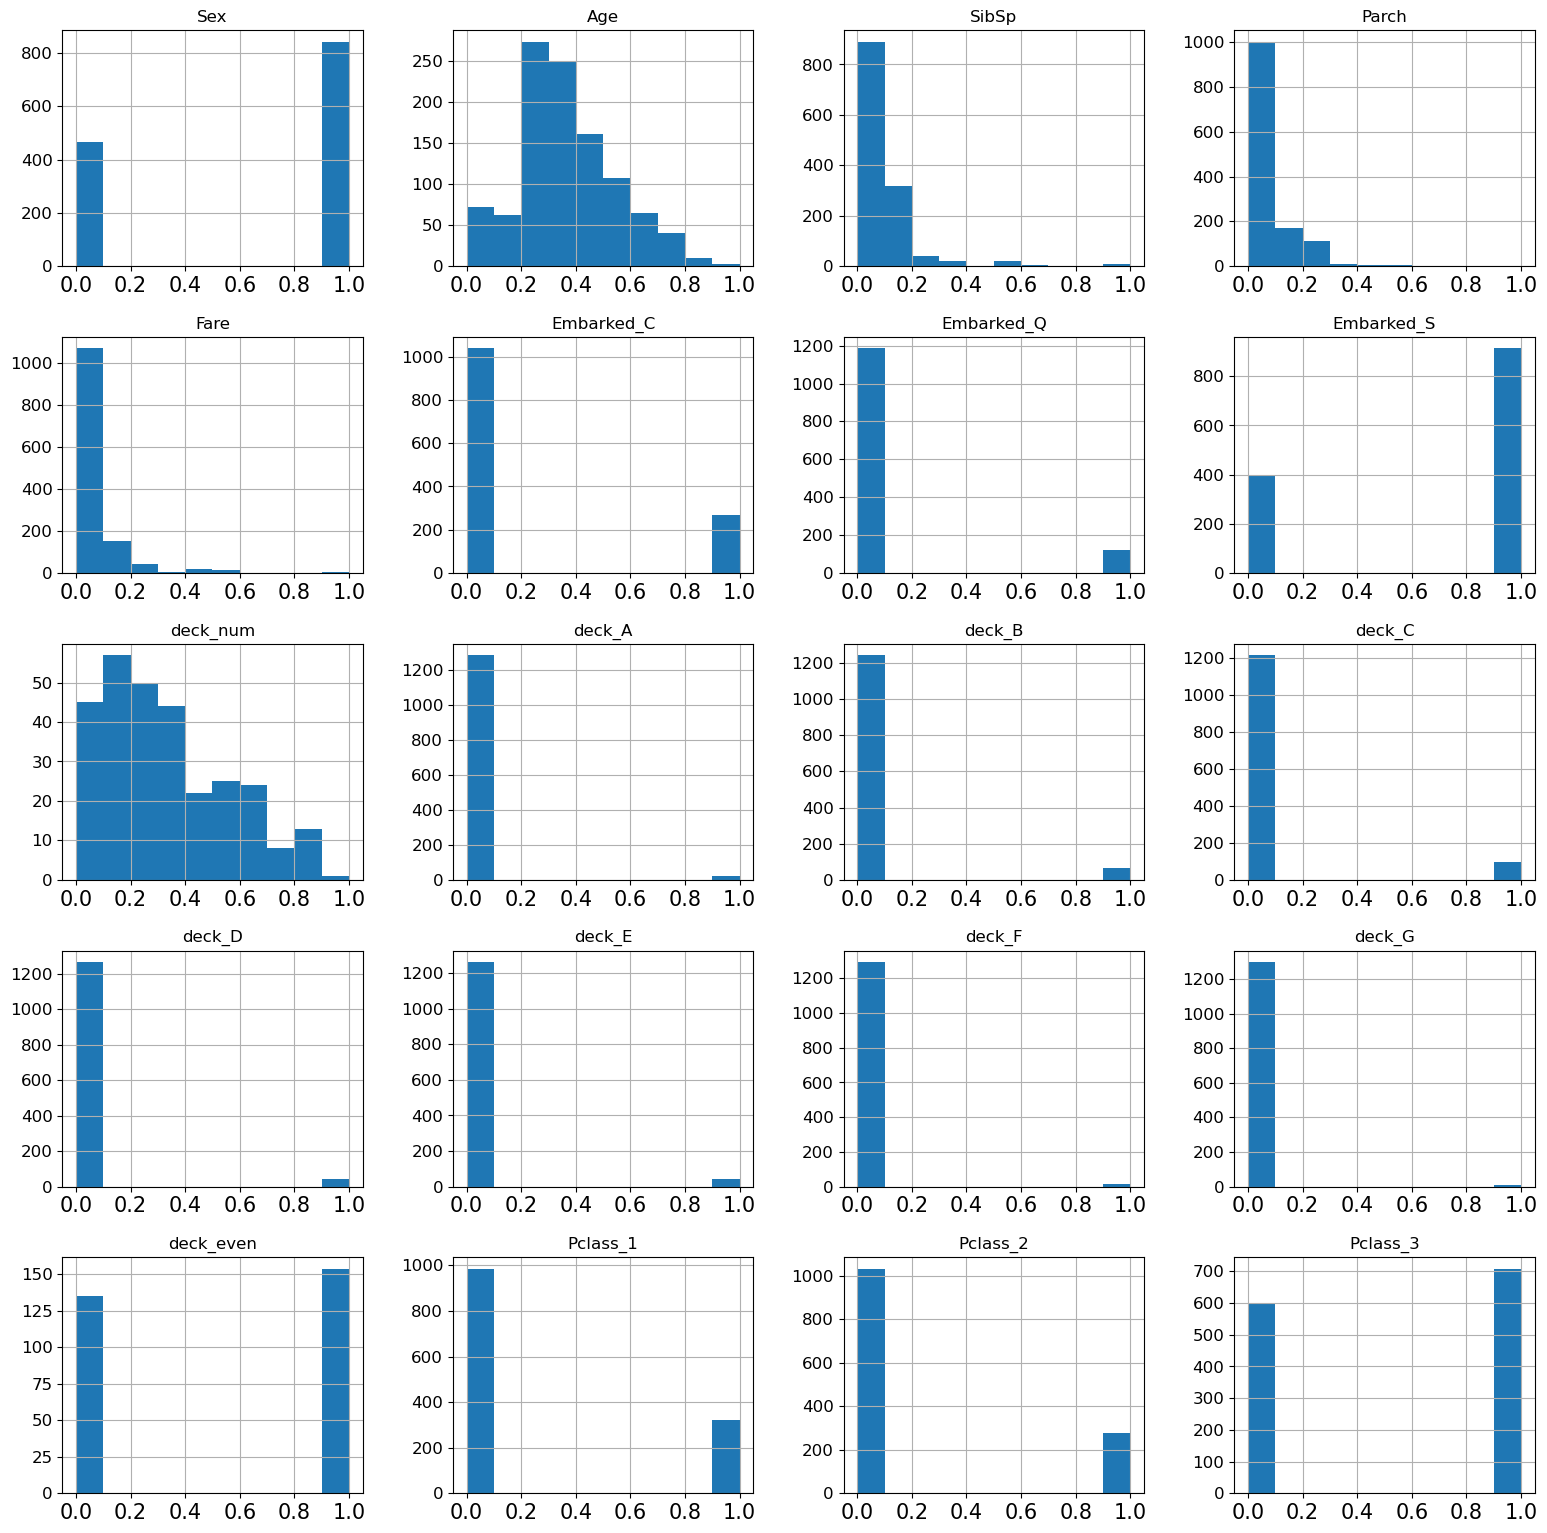

In [28]:
X_norm.hist(xlabelsize=15, ylabelsize=12, figsize=[19, 19])

array([[<Axes: title={'center': 'Sex'}>, <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>],
       [<Axes: title={'center': 'Fare'}>,
        <Axes: title={'center': 'Embarked_C'}>,
        <Axes: title={'center': 'Embarked_Q'}>,
        <Axes: title={'center': 'Embarked_S'}>],
       [<Axes: title={'center': 'deck_num'}>,
        <Axes: title={'center': 'deck_A'}>,
        <Axes: title={'center': 'deck_B'}>,
        <Axes: title={'center': 'deck_C'}>],
       [<Axes: title={'center': 'deck_D'}>,
        <Axes: title={'center': 'deck_E'}>,
        <Axes: title={'center': 'deck_F'}>,
        <Axes: title={'center': 'deck_G'}>],
       [<Axes: title={'center': 'deck_even'}>,
        <Axes: title={'center': 'Pclass_1'}>,
        <Axes: title={'center': 'Pclass_2'}>,
        <Axes: title={'center': 'Pclass_3'}>]], dtype=object)

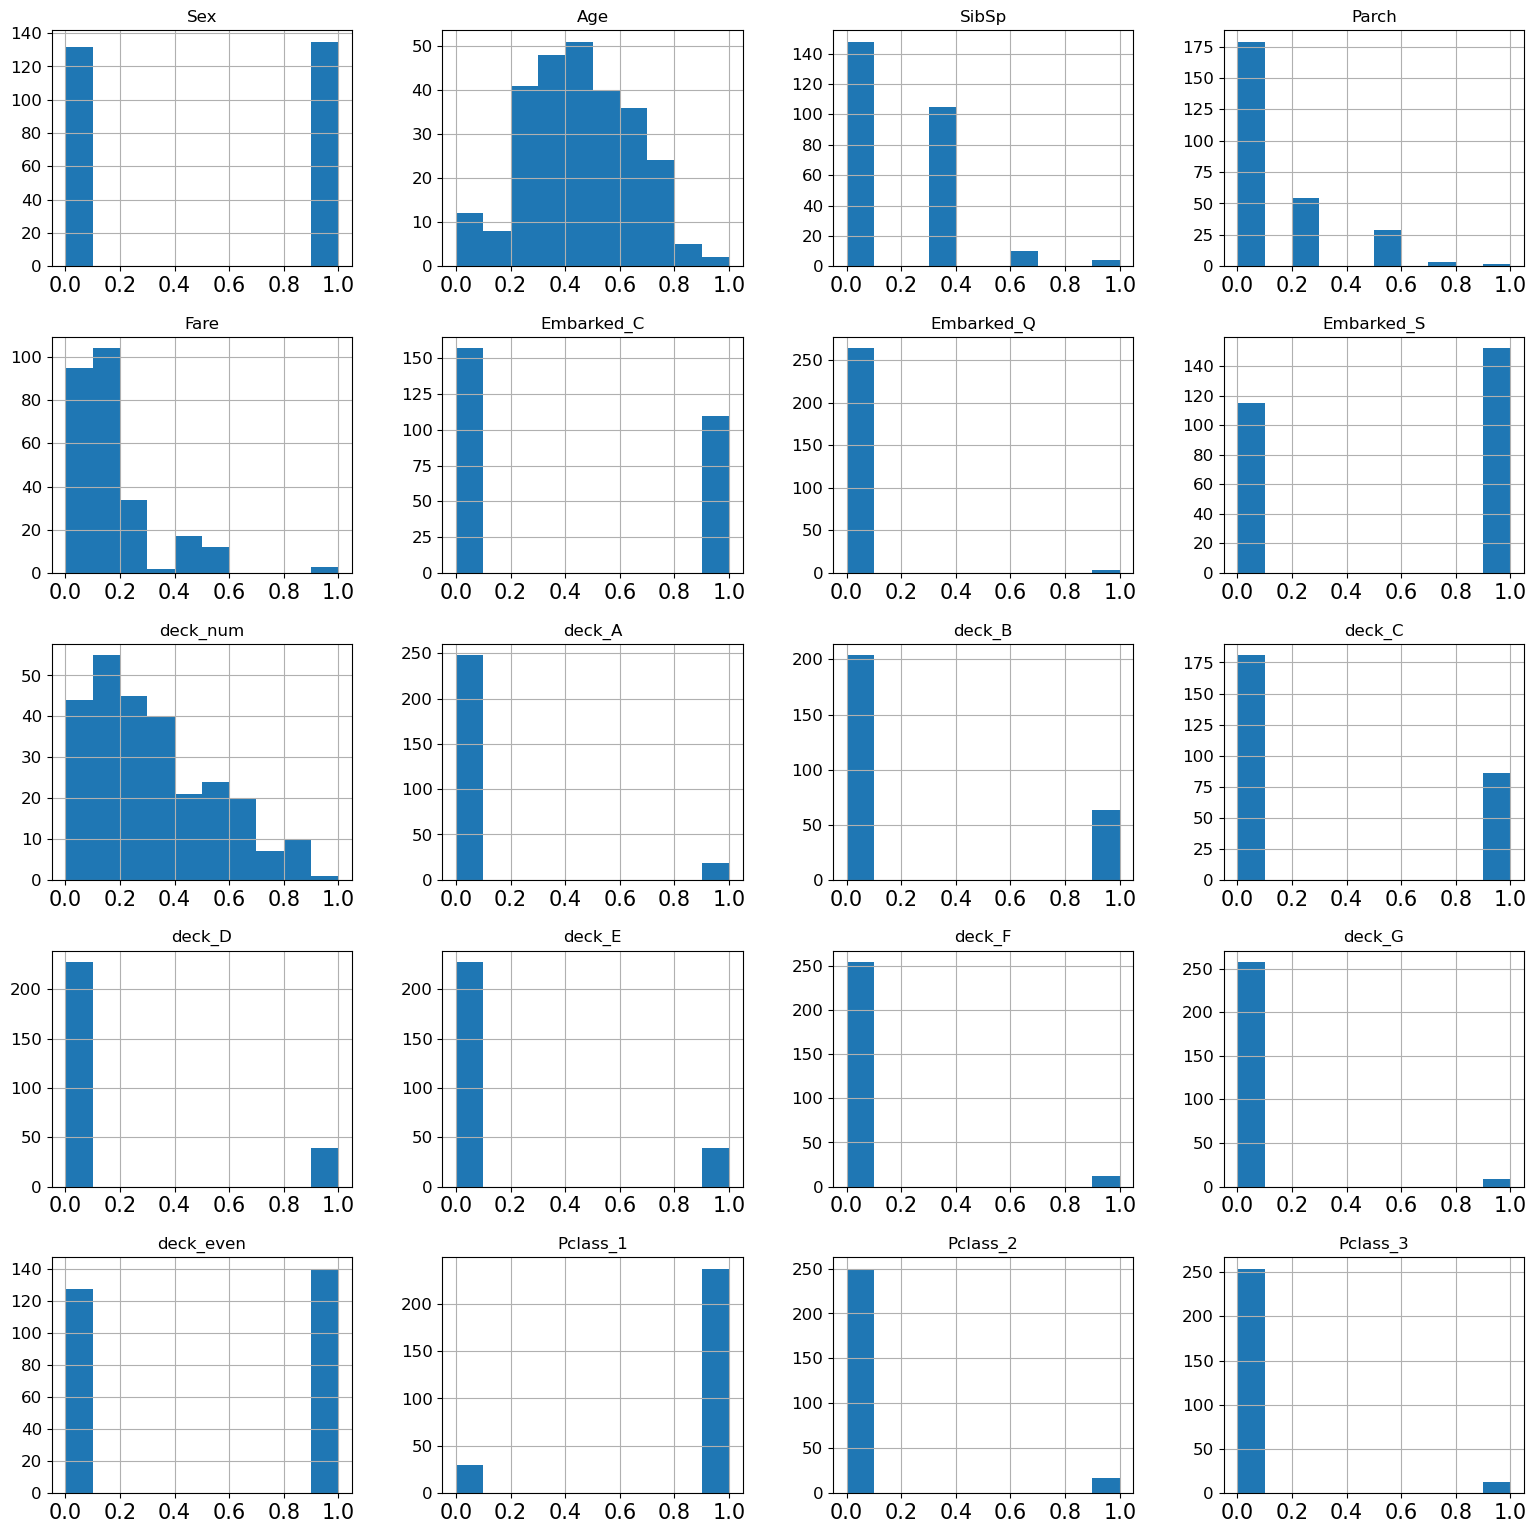

In [29]:
X_norm_n.hist(xlabelsize=15, ylabelsize=12, figsize=[19, 19])

array([[<Axes: title={'center': 'Sex'}>, <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>],
       [<Axes: title={'center': 'Fare'}>,
        <Axes: title={'center': 'Embarked_C'}>,
        <Axes: title={'center': 'Embarked_Q'}>,
        <Axes: title={'center': 'Embarked_S'}>],
       [<Axes: title={'center': 'deck_num'}>,
        <Axes: title={'center': 'deck_A'}>,
        <Axes: title={'center': 'deck_B'}>,
        <Axes: title={'center': 'deck_C'}>],
       [<Axes: title={'center': 'deck_D'}>,
        <Axes: title={'center': 'deck_E'}>,
        <Axes: title={'center': 'deck_F'}>,
        <Axes: title={'center': 'deck_G'}>],
       [<Axes: title={'center': 'deck_even'}>,
        <Axes: title={'center': 'Pclass_1'}>,
        <Axes: title={'center': 'Pclass_2'}>,
        <Axes: title={'center': 'Pclass_3'}>]], dtype=object)

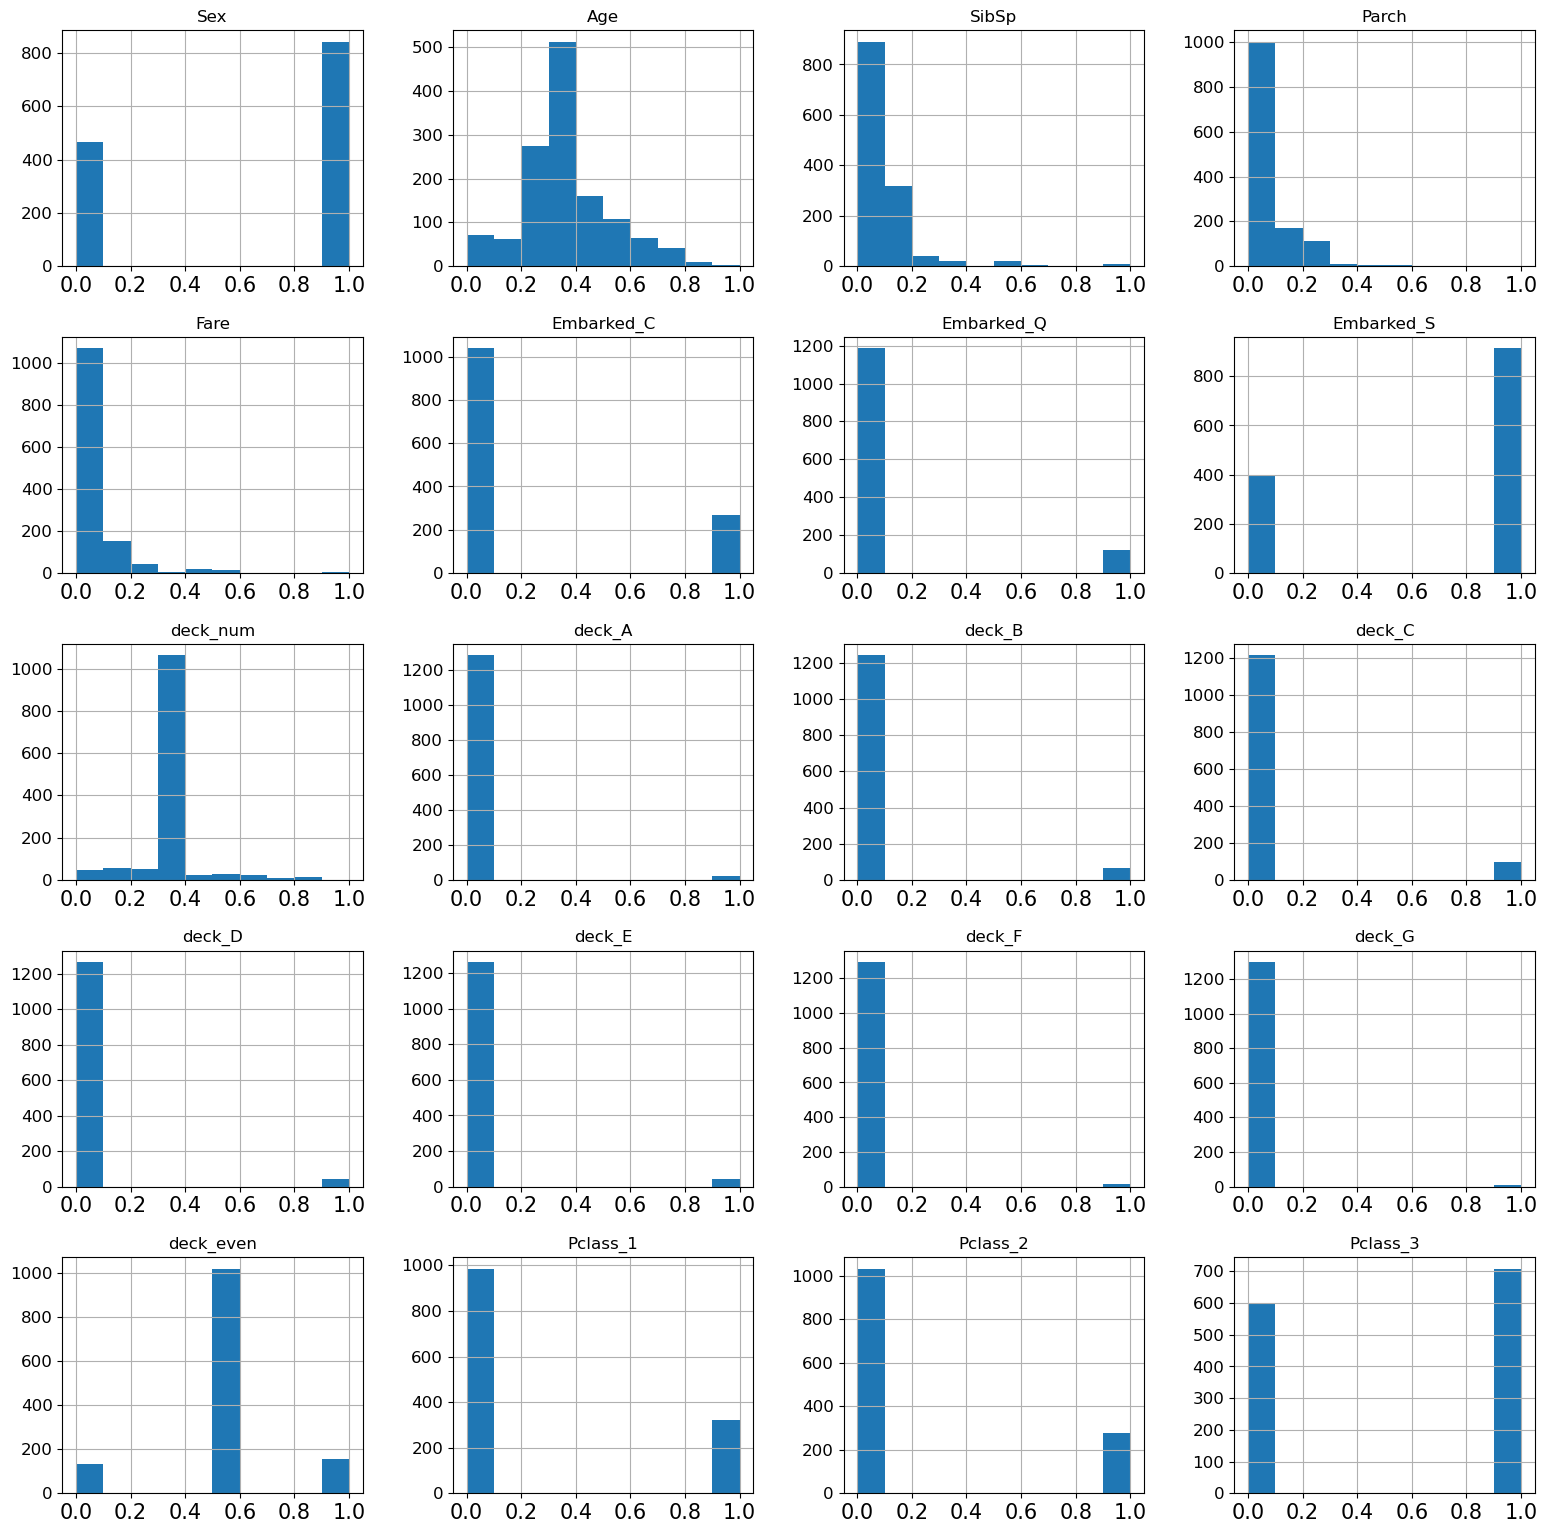

In [30]:
X_norm_nc.hist(xlabelsize=15, ylabelsize=12, figsize=[19, 19])

## Notice the difference in the Age and Fare histogram plots between these 3 differently preprocessed datasets

## Also notice the size of the unedited no-NaN dataset vs the original (267 vs 1309 datapoints), the middle column of "deck_even" in the X_norm_nc histogram shows considerable size of would-be-NaNs for just that feature

# Create Test-Train splits

In [31]:
from sklearn.model_selection import train_test_split

X_train,         X_test,         Y_train,         Y_test         = train_test_split(X,         Y,         test_size=0.2, random_state=0, stratify=Y        )
X_train_n,       X_test_n,       Y_train_n,       Y_test_n       = train_test_split(X_n,       Y_n,       test_size=0.2, random_state=0, stratify=Y_n      )
X_train_nc,      X_test_nc,      Y_train_nc,      Y_test_nc      = train_test_split(X_nc,      Y_nc,      test_size=0.2, random_state=0, stratify=Y_nc     )
X_norm_train,    X_norm_test,    Y_norm_train,    Y_norm_test    = train_test_split(X_norm,    Y_norm,    test_size=0.2, random_state=0, stratify=Y_norm   )
X_norm_train_n,  X_norm_test_n,  Y_norm_train_n,  Y_norm_test_n  = train_test_split(X_norm_n,  Y_norm_n,  test_size=0.2, random_state=0, stratify=Y_norm_n )
X_norm_train_nc, X_norm_test_nc, Y_norm_train_nc, Y_norm_test_nc = train_test_split(X_norm_nc, Y_norm_nc, test_size=0.2, random_state=0, stratify=Y_norm_nc)


##### We'll also need this list of which values are categorical (vs continuous)

In [32]:
categorical =    [1,   0,    0,     0,    0,   1,   1,   1,    0, 1, 1, 1, 1, 1, 1, 1,    1,  1,  1,  1]
#               sex, age, sibs, prnts, fare, emb, emb, emb, deck, a, b, c, d, e, f, g, EVEN, p1, p2, p3

categorical_nc = [1,   0,    0,     0,    0,   1,   1,   1,    0, 1, 1, 1, 1, 1, 1, 1,    0,  1,  1,  1]
#               sex, age, sibs, prnts, fare, emb, emb, emb, deck, a, b, c, d, e, f, g, EVEN, p1, p2, p3

###### and a container for our best models of each type

In [33]:
best_models        = [[]]  #Full data only
best_nonan_models  = [[]]  #NaN dropped only
best_filled_models = [[]]  #NaN filled only

num_models_trained        = 0
num_nonan_models_trained  = 0
num_filled_models_trained = 0

# Let's Train a Model

### We'll do a single decision tree using only data with no NaN values. There are only 181 (267 if using full dataset) no-NaN rows so we shouldn't expect great results

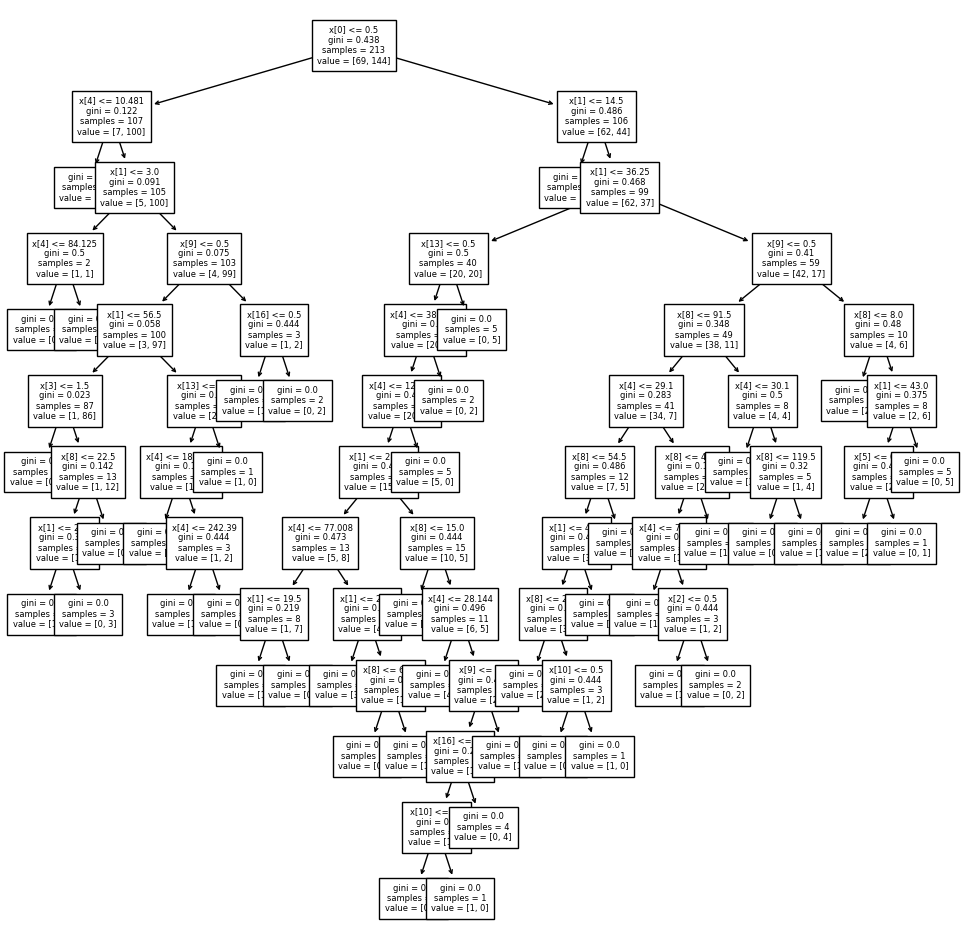

In [34]:
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score


tree_ = tree.DecisionTreeClassifier()
tree_.fit(X_train_n, Y_train_n)
num_nonan_models_trained += 1

plt.figure(figsize=(12,12))
tree.plot_tree(tree_, fontsize=6)
plt.savefig('tree_high_dpi', dpi=100)

#### In this representation, True is to the left and False is to the right. So the first node reads: 
#### X[0] <= 0.5 which corresponds to Female (X[0] = 0) to the left and Male (X[0] = 1) to the right

In [35]:
Y_pred_n = tree_.predict(X_test_n)

accuracy = accuracy_score(Y_test_n, Y_pred_n)
f1       =       f1_score(Y_test_n, Y_pred_n)

print(accuracy)
best_nonan_models.append([accuracy, f1, tree_, "Un-normalized nonan data"])

0.6851851851851852


##### Between 56% and almost 90% accuracy depending on random distribution of data.

#### Let's run this same attempt with the X_nc dataset with many NaN's edited:

0.7519083969465649


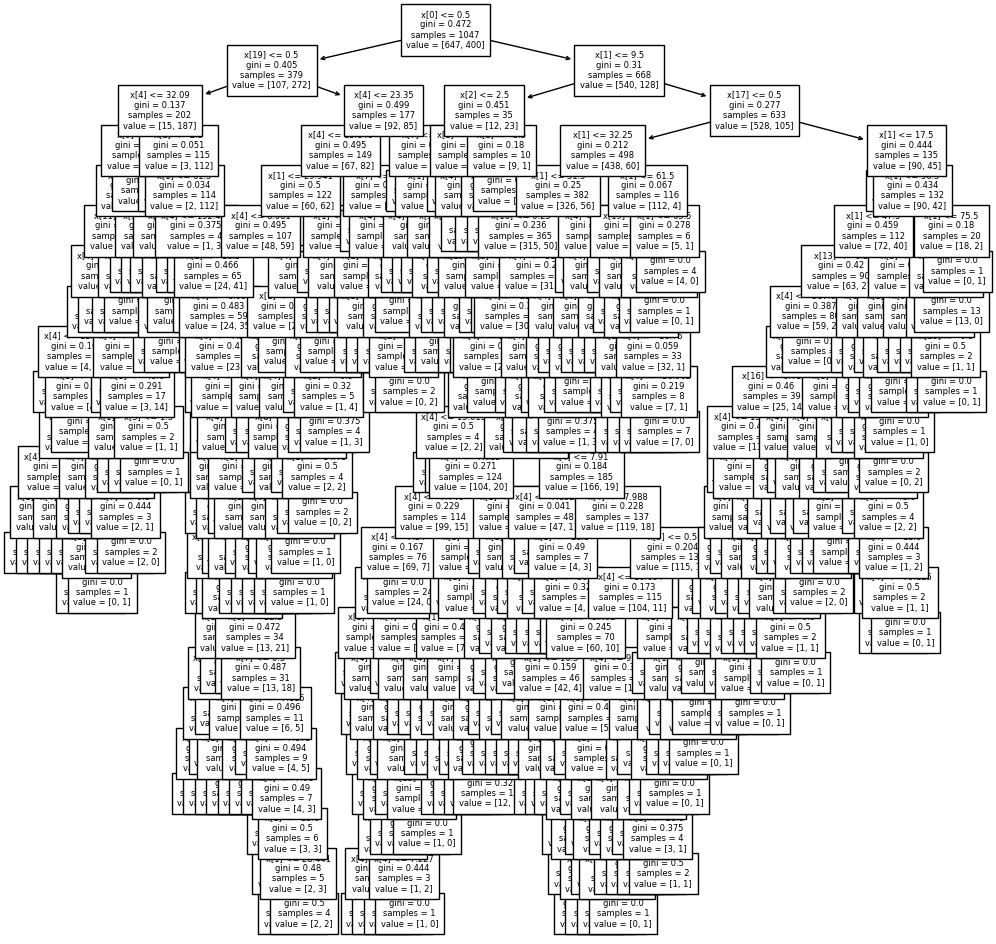

In [36]:
tree0 = tree.DecisionTreeClassifier()
tree0.fit(X_train_nc, Y_train_nc)
num_filled_models_trained += 1

plt.figure(figsize=(12,12))
tree.plot_tree(tree0, fontsize=6)
plt.savefig('tree0_high_dpi', dpi=100)

Y_pred_nc = tree0.predict(X_test_nc)

accuracy = accuracy_score(Y_test_nc, Y_pred_nc)
f1       =       f1_score(Y_test_n, Y_pred_n)
print(accuracy)
best_filled_models.append([accuracy, f1, tree0, "Un-normalized nonan filled data"])

### The edited dataset seems to outperform the vanila dataset with NaN values dropped, let's check against max tree depth for both sets

In [37]:
max_acc = [0]

max_max_tree_depth = 20
plotter = np.zeros((max_max_tree_depth, 2))

for i in range(1, max_max_tree_depth+1):
    tree1 = tree.DecisionTreeClassifier(max_depth=i)
    tree1.fit(X_train_n, Y_train_n)
    num_nonan_models_trained += 1
    
    Y_pred_n = tree1.predict(X_test_n)
    accuracy = accuracy_score(Y_test_n, Y_pred_n)
    f1       =       f1_score(Y_test_n, Y_pred_n)
    
    plotter[i-1, 0] = i
    plotter[i-1, 1] = accuracy  
    #print("\nMax Depth: ", i, "\naccuracy: ", accuracy)
    if (accuracy > max_acc[0]):
        max_acc = [accuracy, f1, tree1, "Un-normalized nonan data"]
    
print("\n\nMaximum accuracy achieved: ", max_acc)
best_nonan_models.append(max_acc)



Maximum accuracy achieved:  [0.8148148148148148, 0.8484848484848485, DecisionTreeClassifier(max_depth=4), 'Un-normalized nonan data']


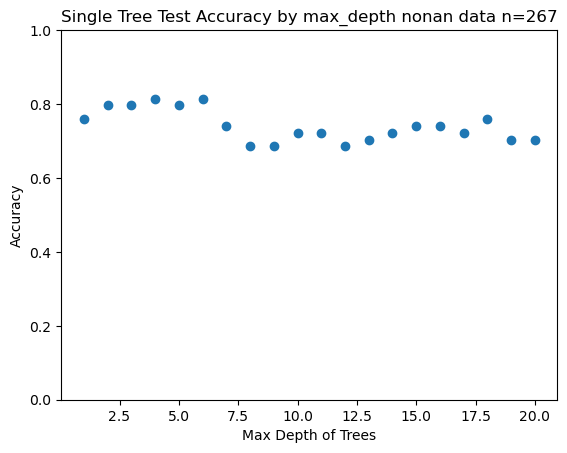

In [38]:
fig, ax = plt.subplots()
ax.set_title("Single Tree Test Accuracy by max_depth nonan data n=" + str(nonan_rows))
ax.set_ylabel("Accuracy")
ax.set_xlabel("Max Depth of Trees")
ax.set_ylim((0,1))
ax.scatter(plotter[:, 0], plotter[:, 1]);

In [39]:
max_acc = [0]

max_max_tree_depth = 20
plotter = np.zeros((max_max_tree_depth, 2))

for i in range(1, max_max_tree_depth+1):
    tree1 = tree.DecisionTreeClassifier(max_depth=i)
    tree1.fit(X_train_nc, Y_train_nc)
    num_filled_models_trained += 1
    
    Y_pred_nc = tree1.predict(X_test_nc)
    accuracy = accuracy_score(Y_test_nc, Y_pred_nc)
    f1       =       f1_score(Y_test_nc, Y_pred_nc)
    
    plotter[i-1, 0] = i
    plotter[i-1, 1] = accuracy  
    #print("\nMax Depth: ", i, "\naccuracy: ", accuracy)
    if (accuracy > max_acc[0]):
        max_acc = [accuracy, f1, tree1, "Un-normalized nonan filled data"]
    
print("\n\nMaximum accuracy achieved: ", max_acc)
best_filled_models.append(max_acc)



Maximum accuracy achieved:  [0.8244274809160306, 0.75, DecisionTreeClassifier(max_depth=3), 'Un-normalized nonan filled data']


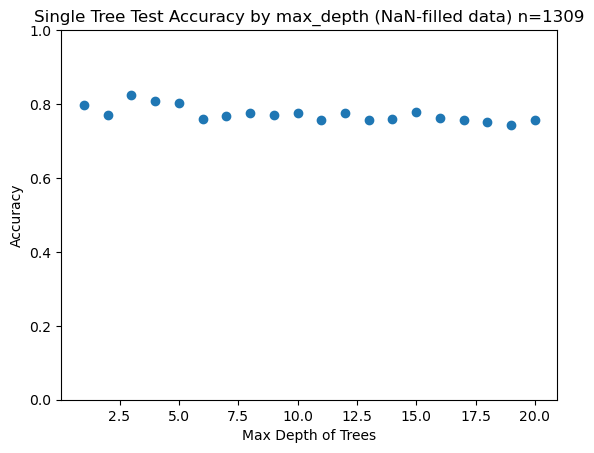

In [40]:
fig, ax = plt.subplots()
ax.set_title("Single Tree Test Accuracy by max_depth (NaN-filled data) n=" + str(filled_rows))
ax.set_ylabel("Accuracy")
ax.set_xlabel("Max Depth of Trees")
ax.set_ylim((0,1))
ax.scatter(plotter[:, 0], plotter[:, 1]);

## What if we try a bunch of trees?

#### and we'll go ahead and iterate over max_depth, default # trees is 100

In [41]:
from sklearn.ensemble import RandomForestClassifier

max_max_tree_depth = 20
plotter = np.zeros((max_max_tree_depth, 2))
max_acc = [0]

for i in range(1, max_max_tree_depth+1):
    forest = RandomForestClassifier(max_depth=i, random_state=0)
    forest.fit(X_train_n, Y_train_n.values.ravel())
    num_nonan_models_trained += 1

    Y_pred_n = forest.predict(X_test_n)
    accuracy = accuracy_score(Y_test_n, Y_pred_n)
    f1       =       f1_score(Y_test_n, Y_pred_n)
    
    plotter[i-1, 0] = i
    plotter[i-1, 1] = accuracy    
    #print("\nMax Depth: ", i, "\naccuracy: ", accuracy)
    if (accuracy > max_acc[0]):
        max_acc = [accuracy, f1, forest, "Un-normalized nonan data"]

best_nonan_models.append(max_acc)
print("\n\nMaximum accuracy achieved: ", max_acc)



Maximum accuracy achieved:  [0.8148148148148148, 0.8571428571428571, RandomForestClassifier(max_depth=9, random_state=0), 'Un-normalized nonan data']


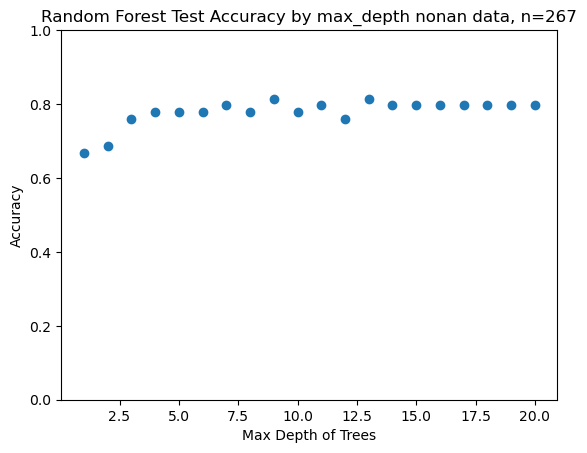

In [42]:
fig, ax = plt.subplots()
ax.set_title("Random Forest Test Accuracy by max_depth nonan data, n=" + str(nonan_rows))
ax.set_ylabel("Accuracy")
ax.set_xlabel("Max Depth of Trees")
ax.set_ylim((0,1))
ax.scatter(plotter[:, 0], plotter[:, 1]);

In [43]:
max_max_tree_depth = 20
plotter = np.zeros((max_max_tree_depth, 2))
max_acc = [0]

for i in range(1, max_max_tree_depth+1):
    forest = RandomForestClassifier(max_depth=i, random_state=0)
    forest.fit(X_train_nc, Y_train_nc.values.ravel())
    num_filled_models_trained += 1

    Y_pred_nc = forest.predict(X_test_nc)
    accuracy = accuracy_score(Y_test_nc, Y_pred_nc)
    f1       =       f1_score(Y_test_nc, Y_pred_nc)
    
    plotter[i-1, 0] = i
    plotter[i-1, 1] = accuracy    
    #print("\nMax Depth: ", i, "\naccuracy: ", accuracy)
    if (accuracy > max_acc[0]):
        max_acc = [accuracy, f1, forest, "Un-normalized nonan filled data"]

best_filled_models.append(max_acc)
print("\n\nMaximum accuracy achieved: ", max_acc)



Maximum accuracy achieved:  [0.8282442748091603, 0.7428571428571429, RandomForestClassifier(max_depth=9, random_state=0), 'Un-normalized nonan filled data']


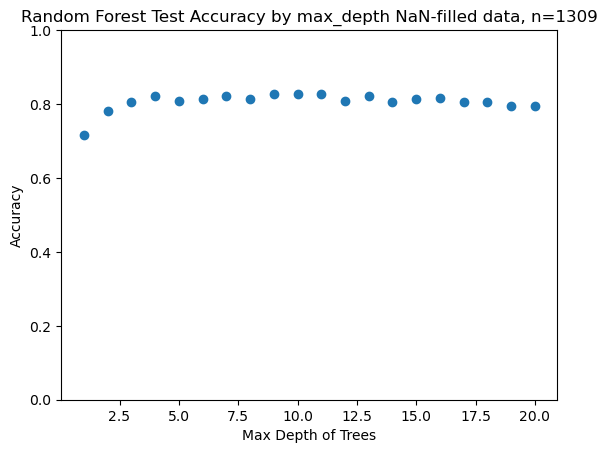

In [44]:
fig, ax = plt.subplots()
ax.set_title("Random Forest Test Accuracy by max_depth NaN-filled data, n=" + str(filled_rows))
ax.set_ylabel("Accuracy")
ax.set_xlabel("Max Depth of Trees")
ax.set_ylim((0,1))
ax.scatter(plotter[:, 0], plotter[:, 1]);

## Let's repeat Random forest on the normalized data, should be the same

In [45]:
max_acc = [0]
max_max_tree_depth = 20
plotter = np.zeros((max_max_tree_depth, 2))

for i in range(1, max_max_tree_depth+1):
    forest2 = RandomForestClassifier(max_depth=i, random_state=0)
    forest2.fit(X_norm_train_n, Y_norm_train_n.values.ravel())
    num_nonan_models_trained += 1

    Y_norm_pred_n = forest2.predict(X_norm_test_n)
    accuracy = accuracy_score(Y_norm_test_n, Y_norm_pred_n)
    f1       =       f1_score(Y_norm_test_n, Y_norm_pred_n)

    plotter[i-1, 0] = i
    plotter[i-1, 1] = accuracy
    if (accuracy > max_acc[0]):
        max_acc = [accuracy, f1, forest2, "Normalized nonan data"]
        
best_nonan_models.append(max_acc)
print("\n\nMaximum accuracy achieved: ", max_acc)



Maximum accuracy achieved:  [0.8148148148148148, 0.8571428571428571, RandomForestClassifier(max_depth=9, random_state=0), 'Normalized nonan data']


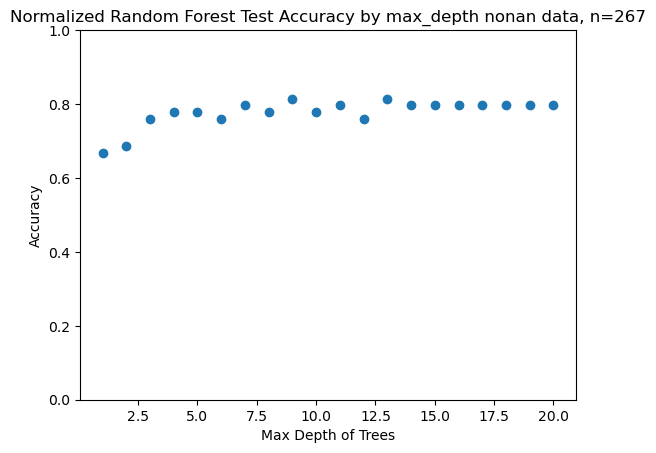

In [46]:
fig, ax = plt.subplots()
ax.set_title("Normalized Random Forest Test Accuracy by max_depth nonan data, n=" + str(nonan_rows))
ax.set_ylabel("Accuracy")
ax.set_xlabel("Max Depth of Trees")
ax.set_ylim((0,1))
ax.scatter(plotter[:, 0], plotter[:, 1]);

In [47]:
max_acc = [0]
max_max_tree_depth = 20
plotter = np.zeros((max_max_tree_depth, 2))

for i in range(1, max_max_tree_depth+1):
    forest2 = RandomForestClassifier(max_depth=i, random_state=0)
    forest2.fit(X_norm_train_nc, Y_norm_train_nc.values.ravel())
    num_filled_models_trained += 1

    Y_norm_pred_nc = forest2.predict(X_norm_test_nc)
    accuracy = accuracy_score(Y_norm_test_nc, Y_norm_pred_nc)
    f1       =       f1_score(Y_norm_test_nc, Y_norm_pred_nc)
    
    plotter[i-1, 0] = i
    plotter[i-1, 1] = accuracy
    if (accuracy > max_acc[0]):
        max_acc = [accuracy, f1, forest2, "Normalized nonan filled data"]
        
best_filled_models.append(max_acc)
print("\n\nMaximum accuracy achieved: ", max_acc)



Maximum accuracy achieved:  [0.8282442748091603, 0.7428571428571429, RandomForestClassifier(max_depth=9, random_state=0), 'Normalized nonan filled data']


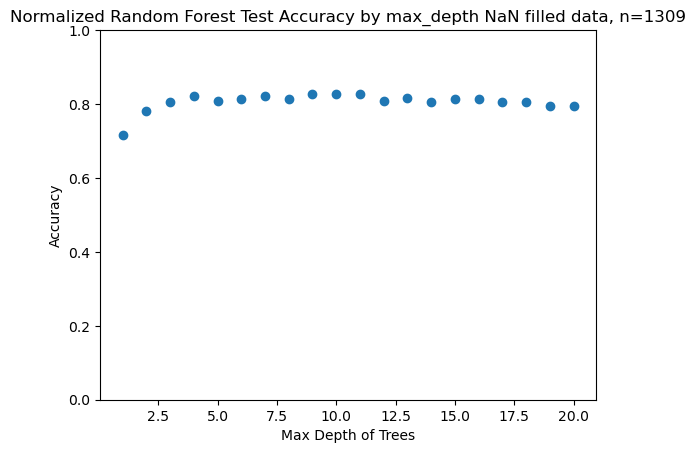

In [48]:
fig, ax = plt.subplots()
ax.set_title("Normalized Random Forest Test Accuracy by max_depth NaN filled data, n=" +str(filled_rows))
ax.set_ylabel("Accuracy")
ax.set_xlabel("Max Depth of Trees")
ax.set_ylim((0,1))
ax.scatter(plotter[:, 0], plotter[:, 1]);

In [49]:
max_acc = [0]
max_max_tree_depth = 20
max_num_trees = 150
plotter = np.zeros((max_max_tree_depth, max_num_trees))

for i in range(1, max_num_trees+1):    
    for j in range(1, max_max_tree_depth+1):
        
        forest2 = RandomForestClassifier(n_estimators=i, max_depth=j, random_state=0)
        forest2.fit(X_norm_train_n, Y_norm_train_n.values.ravel())
        num_nonan_models_trained += 1

        Y_norm_pred_n = forest2.predict(X_norm_test_n)
        accuracy = accuracy_score(Y_norm_test_n, Y_norm_pred_n)
        f1       =       f1_score(Y_norm_test_n, Y_norm_pred_n)
        
        plotter[j-1][i-1] = accuracy
        if (accuracy > max_acc[0]):
            max_acc = [accuracy, f1, forest2, "Normalized nonan data"]
        
best_nonan_models.append(max_acc)

In [50]:
print("Maximum accuracy achieved: ", max_acc)

Maximum accuracy achieved:  [0.8518518518518519, 0.8888888888888888, RandomForestClassifier(max_depth=7, n_estimators=9, random_state=0), 'Normalized nonan data']


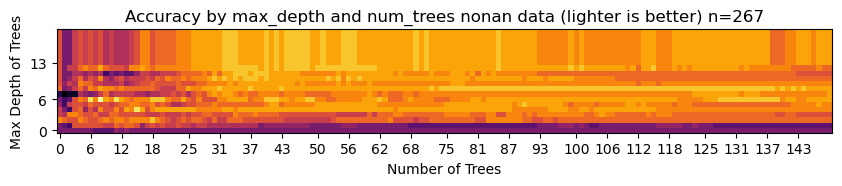

In [51]:
fig, ax = plt.subplots(figsize=(10,10))
ax.set_title("Accuracy by max_depth and num_trees nonan data (lighter is better) n=" + str(nonan_rows))
ax.set_xlabel("Number of Trees")
ax.set_ylabel("Max Depth of Trees")
ax.xaxis.set_ticks(np.linspace(1, plotter.shape[1], num=int(plotter.shape[1]/6)).astype("int"))
ax.yaxis.set_ticks(np.linspace(1, plotter.shape[0], num=int(plotter.shape[0]/5)).astype("int"))
ax.imshow(plotter, cmap='inferno', origin='lower');

In [52]:
max_acc = [0]
max_max_tree_depth = 20
max_num_trees = 150
plotter = np.zeros((max_max_tree_depth, max_num_trees))

for i in range(1, max_num_trees+1):    
    for j in range(1, max_max_tree_depth+1):
        
        forest2 = RandomForestClassifier(n_estimators=i, max_depth=j, random_state=0)
        forest2.fit(X_norm_train_nc, Y_norm_train_nc.values.ravel())
        num_filled_models_trained += 1

        Y_norm_pred_nc = forest2.predict(X_norm_test_nc)
        accuracy = accuracy_score(Y_norm_test_nc, Y_norm_pred_nc)
        f1       =       f1_score(Y_norm_test_nc, Y_norm_pred_nc)
        
        plotter[j-1][i-1] = accuracy
        if (accuracy > max_acc[0]):
            max_acc = [accuracy, f1, forest2, "Normalized nonan filled data"]
        
best_filled_models.append(max_acc)

In [53]:
print("Maximum accuracy achieved: ", max_acc)

Maximum accuracy achieved:  [0.8435114503816794, 0.7602339181286549, RandomForestClassifier(max_depth=9, n_estimators=58, random_state=0), 'Normalized nonan filled data']


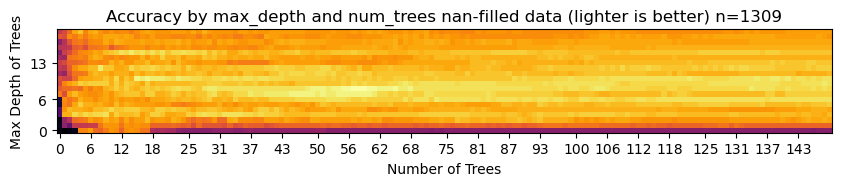

In [54]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title("Accuracy by max_depth and num_trees nan-filled data (lighter is better) n=" + str(filled_rows))
ax.set_xlabel("Number of Trees")
ax.set_ylabel("Max Depth of Trees")
ax.xaxis.set_ticks(np.linspace(1, plotter.shape[1], num=int(plotter.shape[1]/6)).astype("int"))
ax.yaxis.set_ticks(np.linspace(1, plotter.shape[0], num=int(plotter.shape[0]/5)  ).astype("int"))
ax.imshow(plotter, cmap='inferno', origin='lower');

# Principal Component Analysis

First, let's use the Normalized data with no NaN values (_norm_train_n)

In [55]:
from sklearn.decomposition import PCA

In [56]:
max_acc = [0]
max_max_tree_depth = 20
max_pca_features = 20
plotter = np.zeros((max_max_tree_depth, max_pca_features))

for i in range(1, max_pca_features+1):
    
    pca = PCA(n_components = i)
    X_pca_train = pca.fit_transform(X_norm_train_n)
    X_pca_test  = pca.transform(X_norm_test_n )
    
    for j in range(1, max_max_tree_depth+1):
        forest3 = RandomForestClassifier(max_depth=j, random_state=0)
        forest3.fit(X_pca_train, Y_norm_train_n.values.ravel())
        num_nonan_models_trained += 1

        Y_norm_pred_n = forest3.predict(X_pca_test)
        accuracy = accuracy_score(Y_norm_test_n, Y_norm_pred_n)
        f1       =       f1_score(Y_norm_test_n, Y_norm_pred_n)
        #print("num_features: ", i,"\nmax_depth: ", j,  "\naccuracy: ", accuracy, "\n")
        
        plotter[i-1][j-1] = accuracy
        if (accuracy > max_acc[0]):
            max_acc = [accuracy, f1, forest3, "Normalized nonan data", str("PCA components: " + str(i))]
        
best_nonan_models.append(max_acc)

In [57]:
print("Maximum accuracy achieved: ", max_acc)

Maximum accuracy achieved:  [0.8703703703703703, 0.9041095890410958, RandomForestClassifier(max_depth=5, random_state=0), 'Normalized nonan data', 'PCA components: 3']


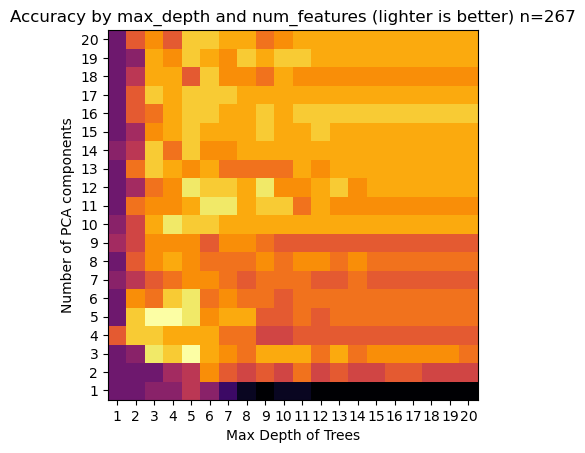

In [58]:
fig, ax = plt.subplots()
ax.set_title("Accuracy by max_depth and num_features (lighter is better) n="+str(nonan_rows))
ax.set_ylabel("Number of PCA components")
ax.set_xlabel("Max Depth of Trees")
ax.yaxis.set_ticks(range(max_pca_features), range(1, max_pca_features+1))
ax.xaxis.set_ticks(range(max_max_tree_depth), np.linspace(1, plotter.shape[1], num=plotter.shape[1]).astype("int"))
ax.imshow(plotter, cmap='inferno', origin='lower');

##### Same thing on the nan-filled normalized data


In [59]:
max_acc = [0]
max_max_tree_depth = 20
max_pca_features = 20
plotter = np.zeros((max_max_tree_depth, max_pca_features))

for i in range(1, max_pca_features+1):
    
    pca = PCA(n_components = i)
    X_pca_train = pca.fit_transform(X_norm_train_nc)
    X_pca_test  = pca.transform(X_norm_test_nc)
    
    for j in range(1, max_max_tree_depth+1):
        forest3 = RandomForestClassifier(max_depth=j, random_state=0)
        forest3.fit(X_pca_train, Y_norm_train_nc.values.ravel())
        num_filled_models_trained += 1

        Y_norm_pred_nc = forest3.predict(X_pca_test)
        accuracy = accuracy_score(Y_norm_test_nc, Y_norm_pred_nc)
        f1       =       f1_score(Y_norm_test_nc, Y_norm_pred_nc)
        #print("num_features: ", i,"\nmax_depth: ", j,  "\naccuracy: ", accuracy, "\n")
        
        plotter[i-1][j-1] = accuracy
        if (accuracy > max_acc[0]):
            max_acc = [accuracy, f1, forest3, "Normalized nonan filled data", str("PCA components: " + str(i))]
        
best_filled_models.append(max_acc)

In [60]:
print("Maximum accuracy achieved: ", max_acc)

Maximum accuracy achieved:  [0.8282442748091603, 0.7398843930635838, RandomForestClassifier(max_depth=6, random_state=0), 'Normalized nonan filled data', 'PCA components: 18']


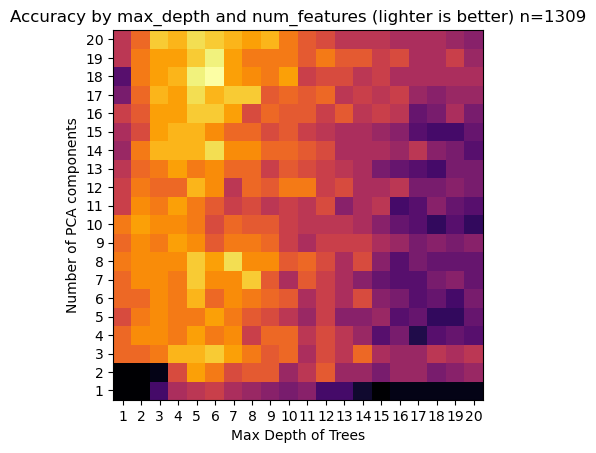

In [61]:
fig, ax = plt.subplots()
ax.set_title("Accuracy by max_depth and num_features (lighter is better) n=" + str(filled_rows))
ax.set_ylabel("Number of PCA components")
ax.set_xlabel("Max Depth of Trees")
ax.invert_yaxis()

ax.yaxis.set_ticks(range(max_pca_features), range(1, max_pca_features+1))
ax.xaxis.set_ticks(range(max_max_tree_depth), np.linspace(1, plotter.shape[1], num=plotter.shape[1]).astype("int"))

ax.imshow(plotter, cmap='inferno', origin='lower');

## Let's hold on to look between Max-Depth of [3, 7] and iterate over PCA components and Number of Trees, but we'll only plot the max-depth=6 value (THIS WILL TAKE A LONG TIME IF TRYING LOTS OF VALUES)

In [62]:
max_acc = [0]
max_num_trees = 120
max_pca_features = 20
min_maxdepth = 3
max_maxdepth = 7

plotter = np.zeros((max_pca_features, max_num_trees))

for i in range(1, max_pca_features+1):
    
    pca = PCA(n_components = i)
    X_pca_train = pca.fit_transform(X_norm_train_nc)
    X_pca_test  = pca.transform(X_norm_test_nc)
    
    for j in range(1, max_num_trees+1):
        for k in range(min_maxdepth, max_maxdepth+1):
            forest3 = RandomForestClassifier(max_depth=k, n_estimators=j, random_state=0)
            forest3.fit(X_pca_train, Y_norm_train_nc.values.ravel())
            num_filled_models_trained += 1

            Y_norm_pred_nc = forest3.predict(X_pca_test)
            accuracy = accuracy_score(Y_norm_test_nc, Y_norm_pred_nc)
            f1       =       f1_score(Y_norm_test_nc, Y_norm_pred_nc)
            #print("num_features: ", i,"\nmax_depth: ", j,  "\naccuracy: ", accuracy, "\n")

            if(k==6):
                plotter[i-1][j-1] = accuracy
            if (accuracy > max_acc[0]):
                max_acc = [accuracy, f1, forest3, "Normalized nonan filled data", str("PCA components: " + str(i))]
        
best_filled_models.append(max_acc)

In [63]:
print("Maximum accuracy achieved: ", max_acc)

Maximum accuracy achieved:  [0.8435114503816794, 0.768361581920904, RandomForestClassifier(max_depth=5, n_estimators=5, random_state=0), 'Normalized nonan filled data', 'PCA components: 17']


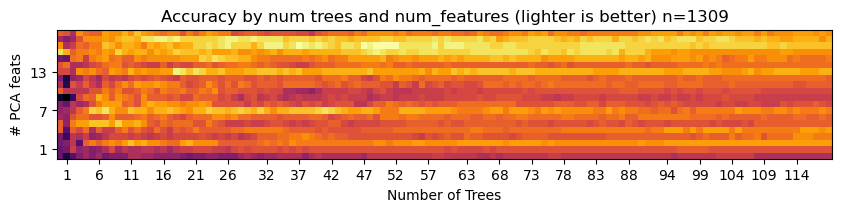

In [64]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title("Accuracy by num trees and num_features (lighter is better) n=" + str(filled_rows))
ax.set_ylabel("# PCA feats")
ax.set_xlabel("Number of Trees")
ax.invert_yaxis()
ax.xaxis.set_ticks(np.linspace(1, plotter.shape[1], num=int(plotter.shape[1]/5)).astype("int"))
ax.yaxis.set_ticks(np.linspace(1, plotter.shape[0], num=int(plotter.shape[0]/5)  ).astype("int"))
ax.imshow(plotter, cmap='inferno', origin='lower');

## We've been using a limited dataset (no NaN values), but we can use the full unedited dataset with NaN values if we use Histogram XG Boost

### Histogram XG Boosted Random Forest Classifier
This estimator has native support for missing values (NaNs). During training, the tree grower learns at each split point whether samples with missing values should go to the left or right child, based on the potential gain. When predicting, samples with missing values are assigned to the left or right child consequently. If no missing values were encountered for a given feature during training, then samples with missing values are mapped to whichever child has the most samples.

### Loss
For binary classification problems, ‘log_loss’ is also known as logistic loss, binomial deviance or binary crossentropy. Internally, the model fits one tree per boosting iteration and uses the logistic sigmoid function (expit) as inverse link function to compute the predicted positive class probability.

### Iterations
max_iter default value is 100
This is the maximum number of iterations of the boosting process, i.e. the maximum number of trees for binary classification.

### L2 regularization
off by default

In [65]:
from sklearn.ensemble import HistGradientBoostingClassifier

hxgb = HistGradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=0).fit(X_train, Y_train.values.ravel())
num_models_trained += 1
accuracy = hxgb.score(X_test, Y_test)
print(accuracy)

0.816793893129771


In [100]:
max_acc = [0]

lr = [0.001, 0.01, 0.1, 1, 3, 5, 10, 25]
max_max_tree_depth = 20

plotter = np.zeros((len(lr), max_max_tree_depth))


for i in range(len(lr)):   
    for j in range(1, max_max_tree_depth+1):
    
        hxgb = HistGradientBoostingClassifier(learning_rate=lr[i], max_depth=j, random_state=0,
                                              categorical_features = categorical).fit(X_train, Y_train.values.ravel())
        num_models_trained += 1
        accuracy = hxgb.score(X_test, Y_test)
        Y_pred_hgb = hxgb.predict(X_test)
        f1 = f1_score(Y_test, Y_pred_hgb)
    
        plotter[i-1][j-1] = accuracy
        
        if (accuracy > max_acc[0]):
                max_acc = [accuracy, f1, hxgb, "Un-normalized full data"]
                #add model to list of max models

best_models.append(max_acc)
print("Max accuracy: ", max_acc)

Max accuracy:  [0.8244274809160306, 0.7261904761904763, HistGradientBoostingClassifier(categorical_features=[1, 0, 0, 0, 0, 1, 1, 1, 0,
                                                     1, 1, 1, 1, 1, 1, 1, 1, 1,
                                                     1, 1],
                               learning_rate=0.01, max_depth=5, random_state=0), 'Un-normalized full data']


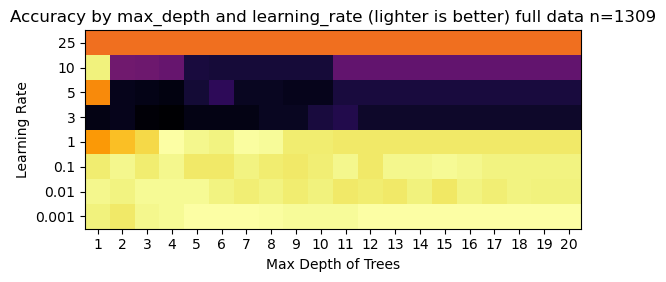

In [102]:
fig, ax = plt.subplots()
ax.set_title("Accuracy by max_depth and learning_rate (lighter is better) full data n=" + str(full_rows))
ax.set_ylabel("Learning Rate")
ax.set_xlabel("Max Depth of Trees")
ax.invert_yaxis()
#ax.yaxis.set_ticks([0.001, 0.01, 0.1, 1, 3, 5, 10, 25])
ax.yaxis.set_ticks(range(len(lr)), lr)
ax.xaxis.set_ticks(range(max_max_tree_depth), np.linspace(1, plotter.shape[1], num=plotter.shape[1]).astype("int"))
ax.imshow(plotter, cmap='inferno', origin='lower');

### lightest horizontal streak is on the second row from the bottom which corresponds to learning rate of 0.01

## Let's do the unnormalized NaN filled dataset with this approach as well

In [72]:
max_acc = [0]

lr = [0.001, 0.01, 0.1, 1, 3, 5, 10, 25]
max_max_tree_depth = 20

plotter = np.zeros((len(lr)-1, max_max_tree_depth))


for i in range(len(lr)):   
    for j in range(1, max_max_tree_depth+1):
    
        hxgb = HistGradientBoostingClassifier(learning_rate=lr[i], max_depth=j, random_state=0,
                                              categorical_features = categorical_nc).fit(X_train_nc, Y_train_nc.values.ravel())
        num_filled_models_trained += 1
        accuracy = hxgb.score(X_test_nc, Y_test_nc)
        Y_pred_hgb = hxgb.predict(X_test)
        f1 = f1_score(Y_test, Y_pred_hgb)
    
        plotter[i-1][j-1] = accuracy
        
        if (accuracy > max_acc[0]):
                max_acc = [accuracy, f1, hxgb, "Un-normalized nonan filled data"]
                #add model to list of max models

best_filled_models.append(max_acc)
print("Max accuracy: ", max_acc)

Max accuracy:  [0.8206106870229007, 0.7303370786516855, HistGradientBoostingClassifier(categorical_features=[1, 0, 0, 0, 0, 1, 1, 1, 0,
                                                     1, 1, 1, 1, 1, 1, 1, 0, 1,
                                                     1, 1],
                               max_depth=5, random_state=0), 'Un-normalized nonan filled data']


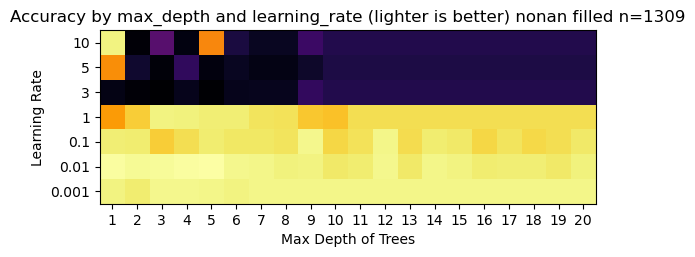

In [75]:
fig, ax = plt.subplots()
ax.set_title("Accuracy by max_depth and learning_rate (lighter is better) nonan filled n=" + str(filled_rows))
ax.set_ylabel("Learning Rate")
ax.set_xlabel("Max Depth of Trees")
ax.invert_yaxis()
#ax.yaxis.set_ticks([0.001, 0.01, 0.1, 1, 3, 5, 10, 25])
ax.yaxis.set_ticks(range(len(lr)), lr)
ax.xaxis.set_ticks(range(max_max_tree_depth), np.linspace(1, plotter.shape[1], num=plotter.shape[1]).astype("int"))
ax.imshow(plotter, cmap='inferno', origin='lower');

### We'll continue to use that and iterate through minimum samples for each leaf

In [76]:
max_acc = [0]
lr = 0.01
max_max_tree_depth = 20
lf_min = 2
lf_max = 10

lfs = range(lf_min, lf_max)
dps = range(max_max_tree_depth)

plotter = np.zeros((len(lfs), max_max_tree_depth-1))



for i in range(len(lfs)):   
    for j in range(1, max_max_tree_depth):
    
        hxgb = HistGradientBoostingClassifier(learning_rate=lr, max_depth=j, random_state=0, max_leaf_nodes = lfs[i],
                                              categorical_features = categorical).fit(X_train, Y_train.values.ravel())
        num_models_trained += 1
        accuracy = hxgb.score(X_test, Y_test)
        Y_pred_hgb = hxgb.predict(X_test)
        f1 = f1_score(Y_test, Y_pred_hgb)
    
        plotter[i-1][j-1] = accuracy
        
        if (accuracy > max_acc[0]):
                max_acc = [accuracy, f1, hxgb, "Un-normalized full data"]
                
                #add model to list of max models
                
print("Max accuracy: ", max_acc)
best_models.append(max_acc)

Max accuracy:  [0.8129770992366412, 0.6918238993710691, HistGradientBoostingClassifier(categorical_features=[1, 0, 0, 0, 0, 1, 1, 1, 0,
                                                     1, 1, 1, 1, 1, 1, 1, 1, 1,
                                                     1, 1],
                               learning_rate=0.01, max_depth=5,
                               max_leaf_nodes=8, random_state=0), 'Un-normalized full data']


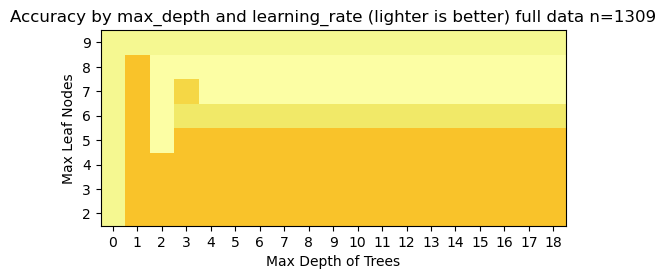

In [77]:
fig, ax = plt.subplots(figsize=(6, 10))
ax.set_title("Accuracy by max_depth and learning_rate (lighter is better) full data n=" + str(full_rows))
ax.set_ylabel("Max Leaf Nodes")
ax.set_xlabel("Max Depth of Trees")
ax.invert_yaxis()
ax.yaxis.set_ticks(range(lf_max-lf_min), lfs)
ax.xaxis.set_ticks(dps)
ax.imshow(plotter, cmap='inferno', origin='lower');
#plt.savefig('HistGradBoost_lr_0_01', dpi=100)

### Below is chart created iterating over 1:47 for max_leaf_nodes and 1:19 for tree depth

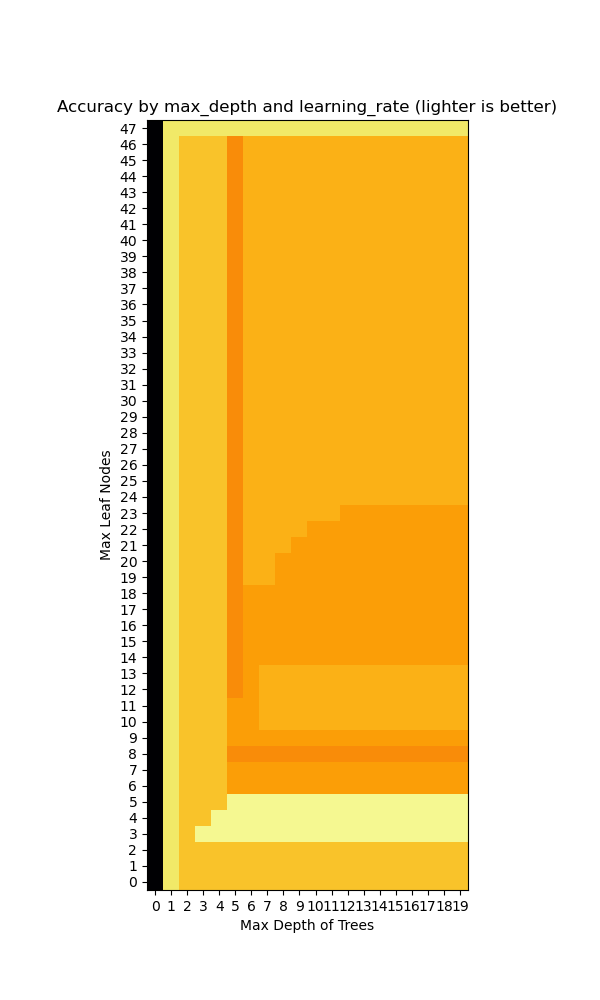

In [78]:
Image("HistGradBoost_lr_0_01.png")

### Same method on nanfilled data

In [103]:
max_acc = [0]
lr = 0.01
max_max_tree_depth = 20
lf_min = 2
lf_max = 10

lfs = range(lf_min, lf_max)
dps = range(max_max_tree_depth)

plotter = np.zeros((len(lfs), max_max_tree_depth))



for i in range(len(lfs)):   
    for j in range(1, max_max_tree_depth+1):
    
        hxgb = HistGradientBoostingClassifier(learning_rate=lr, max_depth=j, random_state=0, max_leaf_nodes = lfs[i],
                                              categorical_features = categorical).fit(X_train_nc, Y_train_nc.values.ravel())
        num_filled_models_trained += 1
        accuracy = hxgb.score(X_test_nc, Y_test_nc)
        Y_pred_hgb = hxgb.predict(X_test)
        f1 = f1_score(Y_test, Y_pred_hgb)
    
        plotter[i-1][j-1] = accuracy
        
        if (accuracy > max_acc[0]):
                max_acc = [accuracy, f1, hxgb, "Un-normalized nonan filled data"]
                
                #add model to list of max models
                
print("Max accuracy: ", max_acc)
best_filled_models.append(max_acc)

Max accuracy:  [0.8091603053435115, 0.6835443037974683, HistGradientBoostingClassifier(categorical_features=[1, 0, 0, 0, 0, 1, 1, 1, 0,
                                                     1, 1, 1, 1, 1, 1, 1, 1, 1,
                                                     1, 1],
                               learning_rate=0.01, max_depth=5,
                               max_leaf_nodes=9, random_state=0), 'Un-normalized nonan filled data']


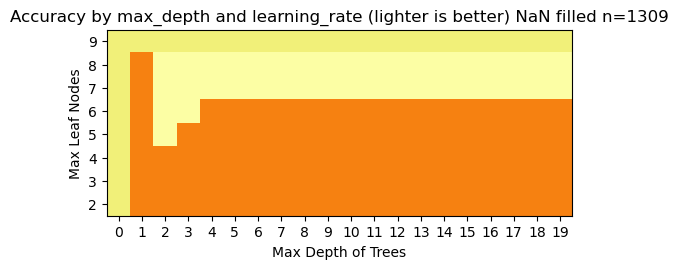

In [104]:
fig, ax = plt.subplots(figsize=(6, 10))
ax.set_title("Accuracy by max_depth and learning_rate (lighter is better) NaN filled n=" + str(filled_rows))
ax.set_ylabel("Max Leaf Nodes")
ax.set_xlabel("Max Depth of Trees")
ax.invert_yaxis()
ax.yaxis.set_ticks(range(lf_max-lf_min), lfs)
ax.xaxis.set_ticks(dps)
ax.imshow(plotter, cmap='inferno', origin='lower', vmin=0.75, vmax=0.8);
#plt.savefig('HistGradBoost_lr_0_01', dpi=100)

# We should also try logistic regression:

### Penalty default = L2 (we can also choose L1, ElasticNet, or None)
### Max_iter default = 100

#### We will do this on the normalized NaN filled dataset

In [81]:
from sklearn.linear_model import LogisticRegression

In [82]:
log_reg = LogisticRegression(random_state=0).fit(X_norm_train_nc, Y_norm_train_nc.values.ravel())
accuracy = log_reg.score(X_norm_test_nc, Y_norm_test_nc)
Y_pred_logreg = log_reg.predict(X_norm_test_nc)
f1 = f1_score(Y_norm_test_nc, Y_pred_logreg)

best_filled_models.append([accuracy, f1, log_reg, "Normalized nonan filled data"])
num_filled_models_trained += 1
print(accuracy)

0.8129770992366412


##### As well as the normalized nonan dataset

In [83]:
log_reg1 = LogisticRegression(random_state=0).fit(X_norm_train_n, Y_norm_train_n.values.ravel())
accuracy = log_reg1.score(X_norm_test_n, Y_norm_test_n)
Y_pred_logreg = log_reg.predict(X_norm_test_n)
f1 = f1_score(Y_norm_test_n, Y_pred_logreg)

best_nonan_models.append([accuracy, f1, log_reg1, "Normalized nonan data"])
num_nonan_models_trained += 1
print(accuracy)

0.7592592592592593


#### Keep using the filled dataset, but iterate through # PCA components

In [84]:
max_acc = [0]
max_pca_features = 20
plotter = np.zeros((max_pca_features, 2))

for i in range(1, max_pca_features):
    
    pca = PCA(n_components = i)
    X_pca_train_nc = pca.fit_transform(X_norm_train_nc)
    X_pca_test_nc  = pca.transform(X_norm_test_nc)
    
    log_reg2 = LogisticRegression(random_state=0).fit(X_pca_train_nc, Y_norm_train_nc.values.ravel())
    num_filled_models_trained += 1
    accuracy = log_reg2.score(X_pca_test_nc, Y_norm_test_nc)
    Y_pred_logreg = log_reg2.predict(X_pca_test_nc)
    f1 = f1_score(Y_norm_test_nc, Y_pred_logreg)
        
    plotter[i, 1] = accuracy
    plotter[i, 0] = i
    if (accuracy > max_acc[0]):
        max_acc = [accuracy, f1, log_reg2, "Normalized nonan filled data", str("PCA components: " + str(i))]
        
best_filled_models.append(max_acc)

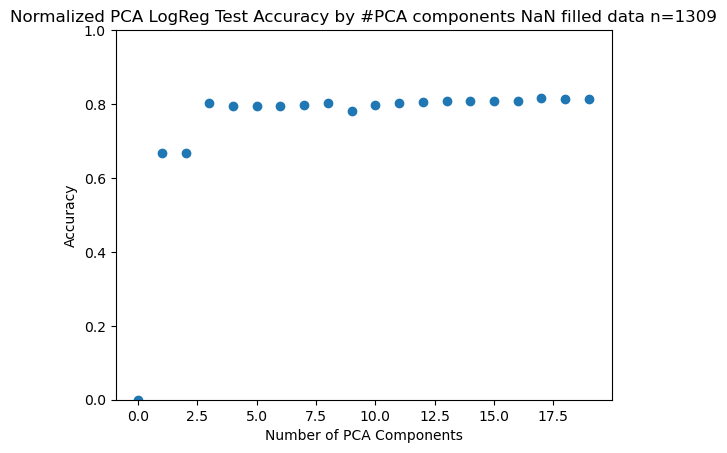

In [85]:
fig, ax = plt.subplots()
ax.set_title("Normalized PCA LogReg Test Accuracy by #PCA components NaN filled data n=" + str(filled_rows))
ax.set_ylabel("Accuracy")
ax.set_xlabel("Number of PCA Components")
ax.set_ylim((0,1))
ax.scatter(plotter[:, 0], plotter[:, 1]);

### Let's also iterate over regularization parameters

### For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ solvers handle multinomial loss;
### Among these, only 'saga' handles all 4 Regularization types and is a version of Stochastic Average Gradient Descent that handles non-smooth l1 penalty

In [86]:
max_acc = [0]
max_pca_features = 20
plotter = np.zeros((max_pca_features, 2))

for i in range(1, max_pca_features):
    
    pca = PCA(n_components = i)
    X_pca_train_nc = pca.fit_transform(X_norm_train_nc)
    X_pca_test_nc  = pca.transform(X_norm_test_nc)
    
    log_reg2 = LogisticRegression(random_state=0, penalty='l2', solver='saga').fit(X_pca_train_nc, Y_norm_train_nc.values.ravel())
    num_filled_models_trained += 1
    accuracy = log_reg2.score(X_pca_test_nc, Y_norm_test_nc)
    Y_pred_logreg = log_reg2.predict(X_pca_test_nc)
    f1 = f1_score(Y_norm_test_nc, Y_pred_logreg)
        
    plotter[i, 1] = accuracy
    plotter[i, 0] = i
    if (accuracy > max_acc[0]):
        max_acc = [accuracy, f1, log_reg2, "Normalized nonan filled data", str("PCA components: " + str(i))]
        
best_filled_models.append(max_acc)

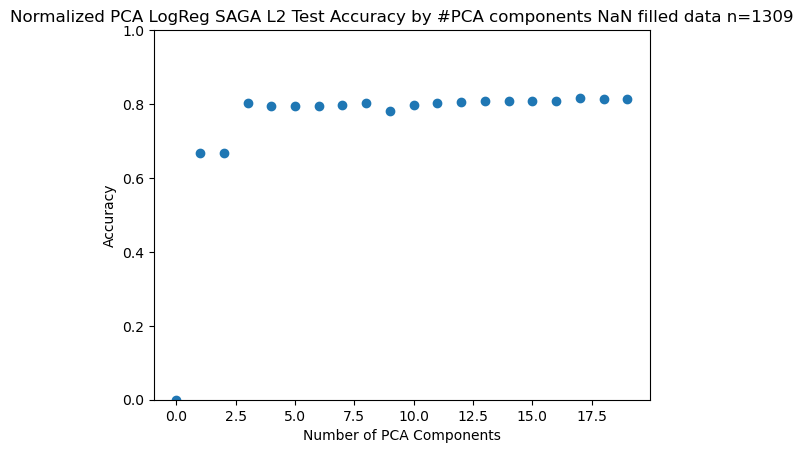

In [87]:
fig, ax = plt.subplots()
ax.set_title("Normalized PCA LogReg SAGA L2 Test Accuracy by #PCA components NaN filled data n=" + str(filled_rows))
ax.set_ylabel("Accuracy")
ax.set_xlabel("Number of PCA Components")
ax.set_ylim((0,1))
ax.scatter(plotter[:, 0], plotter[:, 1]);

In [88]:
max_acc = [0]
max_pca_features = 20
plotter = np.zeros((max_pca_features, 2))

for i in range(1, max_pca_features):
    
    pca = PCA(n_components = i)
    X_pca_train_nc = pca.fit_transform(X_norm_train_nc)
    X_pca_test_nc  = pca.transform(X_norm_test_nc)
    
    log_reg2 = LogisticRegression(random_state=0, penalty='l1', solver='saga').fit(X_pca_train_nc, Y_norm_train_nc.values.ravel())
    num_filled_models_trained += 1
    accuracy = log_reg2.score(X_pca_test_nc, Y_norm_test_nc)
    Y_pred_logreg = log_reg2.predict(X_pca_test_nc)
    f1 = f1_score(Y_norm_test_nc, Y_pred_logreg)
        
    plotter[i, 1] = accuracy
    plotter[i, 0] = i
    if (accuracy > max_acc[0]):
        max_acc = [accuracy, f1, log_reg2, "Normalized nonan filled data", str("PCA components: " + str(i))]
        
best_filled_models.append(max_acc)

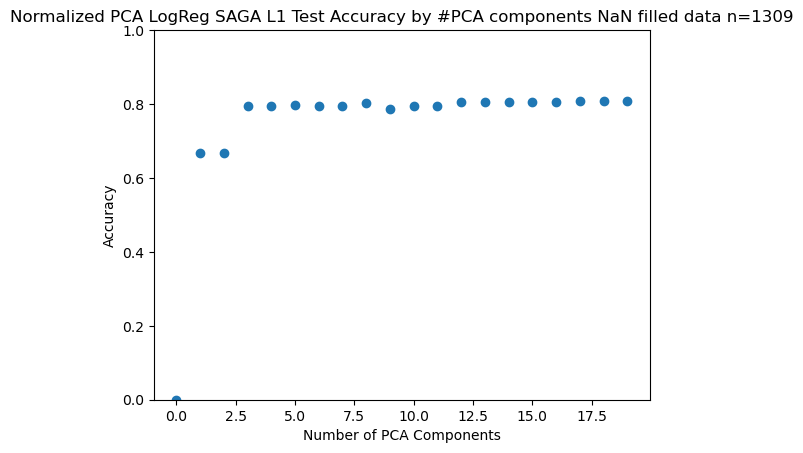

In [89]:
fig, ax = plt.subplots()
ax.set_title("Normalized PCA LogReg SAGA L1 Test Accuracy by #PCA components NaN filled data n=" + str(filled_rows))
ax.set_ylabel("Accuracy")
ax.set_xlabel("Number of PCA Components")
ax.set_ylim((0,1))
ax.scatter(plotter[:, 0], plotter[:, 1]);

In [90]:
max_acc = [0]
max_pca_features = 20
plotter = np.zeros((max_pca_features, 2))

for i in range(1, max_pca_features):
    
    pca = PCA(n_components = i)
    X_pca_train_nc = pca.fit_transform(X_norm_train_nc)
    X_pca_test_nc  = pca.transform(X_norm_test_nc)
    
    log_reg2 = LogisticRegression(random_state=0, penalty=None, solver='saga').fit(X_pca_train_nc, Y_norm_train_nc.values.ravel())
    num_filled_models_trained += 1
    accuracy = log_reg2.score(X_pca_test_nc, Y_norm_test_nc)
    Y_pred_logreg = log_reg2.predict(X_pca_test_nc)
    f1 = f1_score(Y_norm_test_nc, Y_pred_logreg)
        
    plotter[i, 1] = accuracy
    plotter[i, 0] = i
    if (accuracy > max_acc[0]):
        max_acc = [accuracy, f1, log_reg2, "Normalized nonan filled data", str("PCA components: " + str(i))]
        
best_filled_models.append(max_acc)

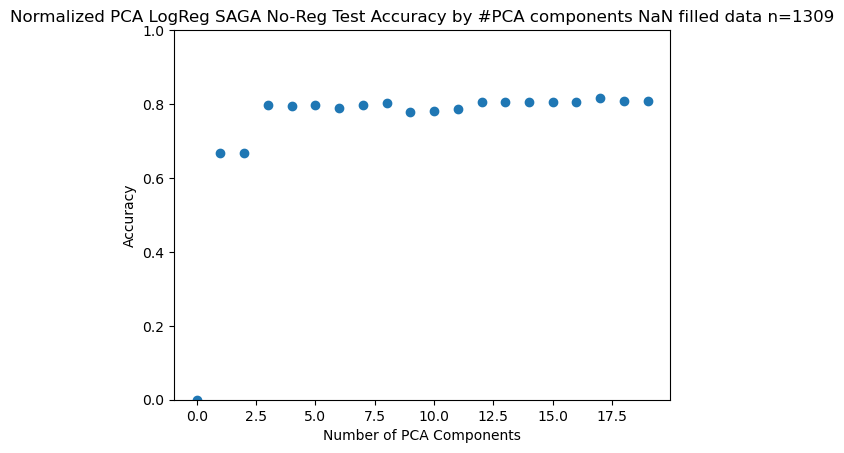

In [91]:
fig, ax = plt.subplots()
ax.set_title("Normalized PCA LogReg SAGA No-Reg Test Accuracy by #PCA components NaN filled data n=" + str(filled_rows))
ax.set_ylabel("Accuracy")
ax.set_xlabel("Number of PCA Components")
ax.set_ylim((0,1))
ax.scatter(plotter[:, 0], plotter[:, 1]);

In [112]:
max_acc = [0]
max_pca_features = 20
#penalties = [None, 'l1', 'l2', 'elasticnet']
l1_rat = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
plotter = np.zeros((max_pca_features, len(l1_rat)))

for i in range(1, max_pca_features+1):
    for j in range(len(l1_rat)):
    
        pca = PCA(n_components = i)
        X_pca_train_nc = pca.fit_transform(X_norm_train_nc)
        X_pca_test_nc  = pca.transform(X_norm_test_nc)

        log_reg3 = LogisticRegression(random_state=0, penalty='elasticnet', solver="saga", 
                                     l1_ratio=l1_rat[j]).fit(X_pca_train_nc, Y_norm_train_nc.values.ravel())
        num_filled_models_trained += 1
        accuracy = log_reg3.score(X_pca_test_nc, Y_norm_test_nc)
        Y_pred_logreg = log_reg3.predict(X_pca_test_nc)
        f1 = f1_score(Y_norm_test_nc, Y_pred_logreg)

        plotter[i-1][j-1] = accuracy
        if (accuracy > max_acc[0]):
            max_acc = [accuracy, f1, log_reg3, "Normalized nonan filled data", str("PCA components: " + str(i))]

print(max_acc)
best_filled_models.append(max_acc)

[0.816793893129771, 0.7473684210526317, LogisticRegression(l1_ratio=0.1, penalty='elasticnet', random_state=0,
                   solver='saga'), 'Normalized nonan filled data', 'PCA components: 17']


range(0, 8) range(2, 10)


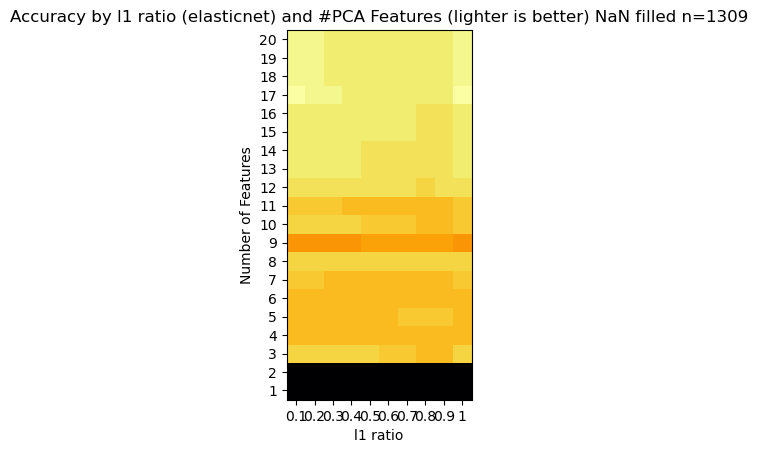

In [113]:
fig, ax = plt.subplots()
ax.set_title("Accuracy by l1 ratio (elasticnet) and #PCA Features (lighter is better) NaN filled n=" + str(filled_rows))
ax.set_ylabel("Number of Features")
ax.set_xlabel("l1 ratio")
ax.invert_yaxis()

print(range(lf_max-lf_min), lfs)

ax.yaxis.set_ticks(range(max_pca_features), range(1, max_pca_features+1))
ax.xaxis.set_ticks(range(10), l1_rat)
ax.imshow(plotter, cmap='inferno', origin='lower');

#### Do exponentiation of non-categorical values, do distance from center of boat (abs(deck_num - deck_mean))

## Best Vanilla Data Model:

In [94]:
max_max_acc = 0
best_model = []
for model in best_models[1:]:
    print(type(model[0]))
    if(model[0] > max_max_acc):
        best_model = model
        max_max_acc = model[0]
    print(model)

<class 'numpy.float64'>
[0.8244274809160306, 0.7261904761904763, HistGradientBoostingClassifier(categorical_features=[1, 0, 0, 0, 0, 1, 1, 1, 0,
                                                     1, 1, 1, 1, 1, 1, 1, 1, 1,
                                                     1, 1],
                               learning_rate=0.01, max_depth=5, random_state=0), 'Un-normalized full data']
<class 'numpy.float64'>
[0.8129770992366412, 0.6918238993710691, HistGradientBoostingClassifier(categorical_features=[1, 0, 0, 0, 0, 1, 1, 1, 0,
                                                     1, 1, 1, 1, 1, 1, 1, 1, 1,
                                                     1, 1],
                               learning_rate=0.01, max_depth=5,
                               max_leaf_nodes=8, random_state=0), 'Un-normalized full data']


In [95]:
print("Number of vanilla data models trained: ", num_models_trained)
print("Best vanilla data model over all: ", best_model)

Number of vanilla data models trained:  305
Best vanilla data model over all:  [0.8244274809160306, 0.7261904761904763, HistGradientBoostingClassifier(categorical_features=[1, 0, 0, 0, 0, 1, 1, 1, 0,
                                                     1, 1, 1, 1, 1, 1, 1, 1, 1,
                                                     1, 1],
                               learning_rate=0.01, max_depth=5, random_state=0), 'Un-normalized full data']


# Best Filled (NaN replaced) Data Model

In [96]:
max_max_acc = 0
best_filled_model = []
for model in best_filled_models[1:]:
    if(model[0] > max_max_acc):
        best_filled_model = model
        max_max_acc = model[0]
    print(model)

[0.7519083969465649, 0.7671232876712328, DecisionTreeClassifier(), 'Un-normalized nonan filled data']
[0.8244274809160306, 0.75, DecisionTreeClassifier(max_depth=3), 'Un-normalized nonan filled data']
[0.8282442748091603, 0.7428571428571429, RandomForestClassifier(max_depth=9, random_state=0), 'Un-normalized nonan filled data']
[0.8282442748091603, 0.7428571428571429, RandomForestClassifier(max_depth=9, random_state=0), 'Normalized nonan filled data']
[0.8435114503816794, 0.7602339181286549, RandomForestClassifier(max_depth=9, n_estimators=58, random_state=0), 'Normalized nonan filled data']
[0.8282442748091603, 0.7398843930635838, RandomForestClassifier(max_depth=6, random_state=0), 'Normalized nonan filled data', 'PCA components: 18']
[0.8435114503816794, 0.768361581920904, RandomForestClassifier(max_depth=5, n_estimators=5, random_state=0), 'Normalized nonan filled data', 'PCA components: 17']
[0.8206106870229007, 0.7303370786516855, HistGradientBoostingClassifier(categorical_featur

In [97]:
print("Number of filled data models trained: ", num_filled_models_trained)
print("Best filled data model over all: ", best_filled_model)

Number of filled data models trained:  16040
Best filled data model over all:  [0.8435114503816794, 0.7602339181286549, RandomForestClassifier(max_depth=9, n_estimators=58, random_state=0), 'Normalized nonan filled data']


# Best no-NaN (NaNs dropped, not replaced) Data Model 

In [98]:
max_max_acc = 0
best_nonan_model = []
for model in best_nonan_models[1:]:
    if(model[0] > max_max_acc):
        best_nonan_model = model
        max_max_acc = model[0]
    print(model)

[0.6851851851851852, 0.7671232876712328, DecisionTreeClassifier(), 'Un-normalized nonan data']
[0.8148148148148148, 0.8484848484848485, DecisionTreeClassifier(max_depth=4), 'Un-normalized nonan data']
[0.8148148148148148, 0.8571428571428571, RandomForestClassifier(max_depth=9, random_state=0), 'Un-normalized nonan data']
[0.8148148148148148, 0.8571428571428571, RandomForestClassifier(max_depth=9, random_state=0), 'Normalized nonan data']
[0.8518518518518519, 0.8888888888888888, RandomForestClassifier(max_depth=7, n_estimators=9, random_state=0), 'Normalized nonan data']
[0.8703703703703703, 0.9041095890410958, RandomForestClassifier(max_depth=5, random_state=0), 'Normalized nonan data', 'PCA components: 3']
[0.7592592592592593, 0.8615384615384615, LogisticRegression(random_state=0), 'Normalized nonan data']


In [114]:
print("Number of nonan data models trained: ", num_nonan_models_trained)
print("Best nonan data model over all: ", best_nonan_model)

Number of nonan data models trained:  3462
Best nonan data model over all:  [0.8703703703703703, 0.9041095890410958, RandomForestClassifier(max_depth=5, random_state=0), 'Normalized nonan data', 'PCA components: 3']
